In [4]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_folder: Path = Path("../")
benchmark_speed_file: Path = data_folder / "benchmark_results_1.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int.csv"
sns.set(rc={'figure.figsize':(30,14)})

## Preprocessing

In [6]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]

# When we display all codecs, the plots get a bit full and messy. So we can filter them a bit
# and just display the codecs we want to see at the moment
filtered_fast_pfor_codecs: DataFrame = benchmark_speeds.loc[~(benchmark_speeds["library"].str.contains("fastPFOR"))]
only_fast_pfor: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].str.contains("fastPFOR"))]
most_interesting_libraries: List[str] = ["turboPFOR_direct", "turboPFOR", "sdsl_lite_dac_vector", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking", "maskedVByte"]
even_more_interesting_libraries = ["turboPFOR_direct", "turboPFOR", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking"]
limited_to_interesting_libs: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].isin(most_interesting_libraries))]
dataset_filtered: DataFrame = limited_to_interesting_libs

## Encoding

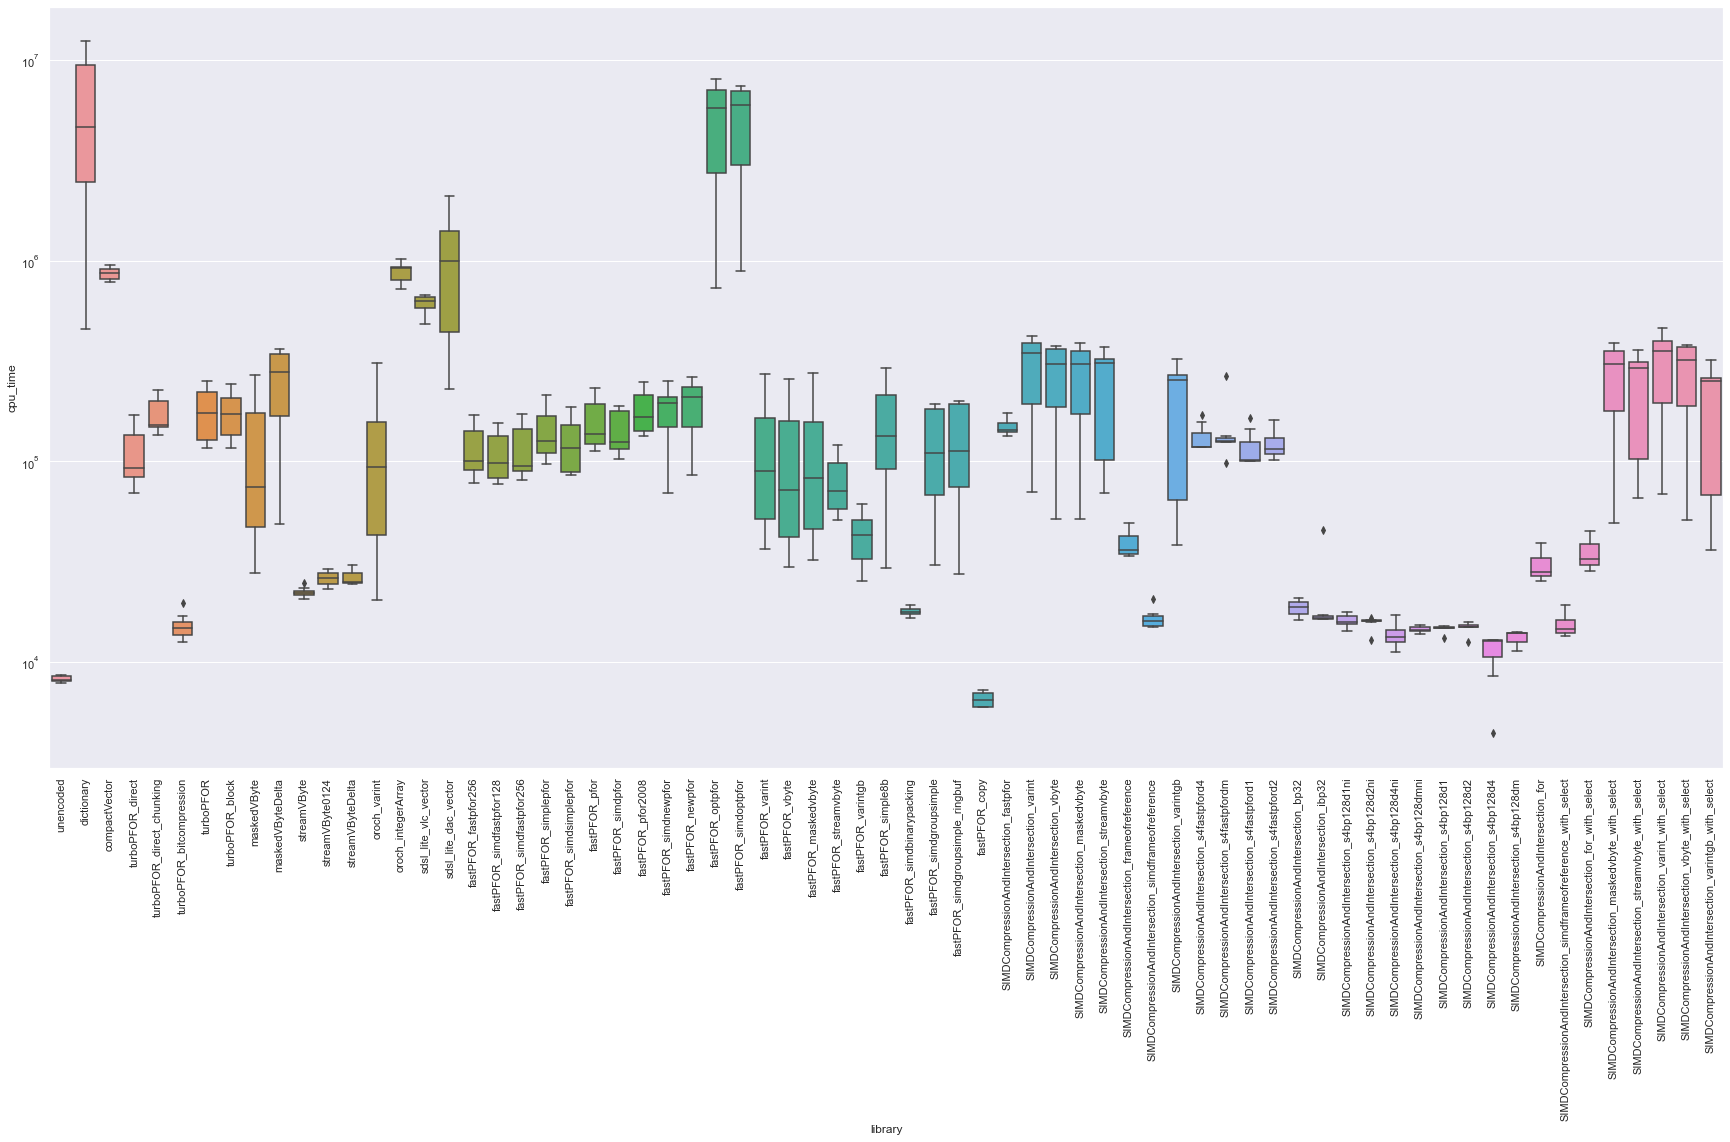

In [7]:
encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Encoding (interesting libs)

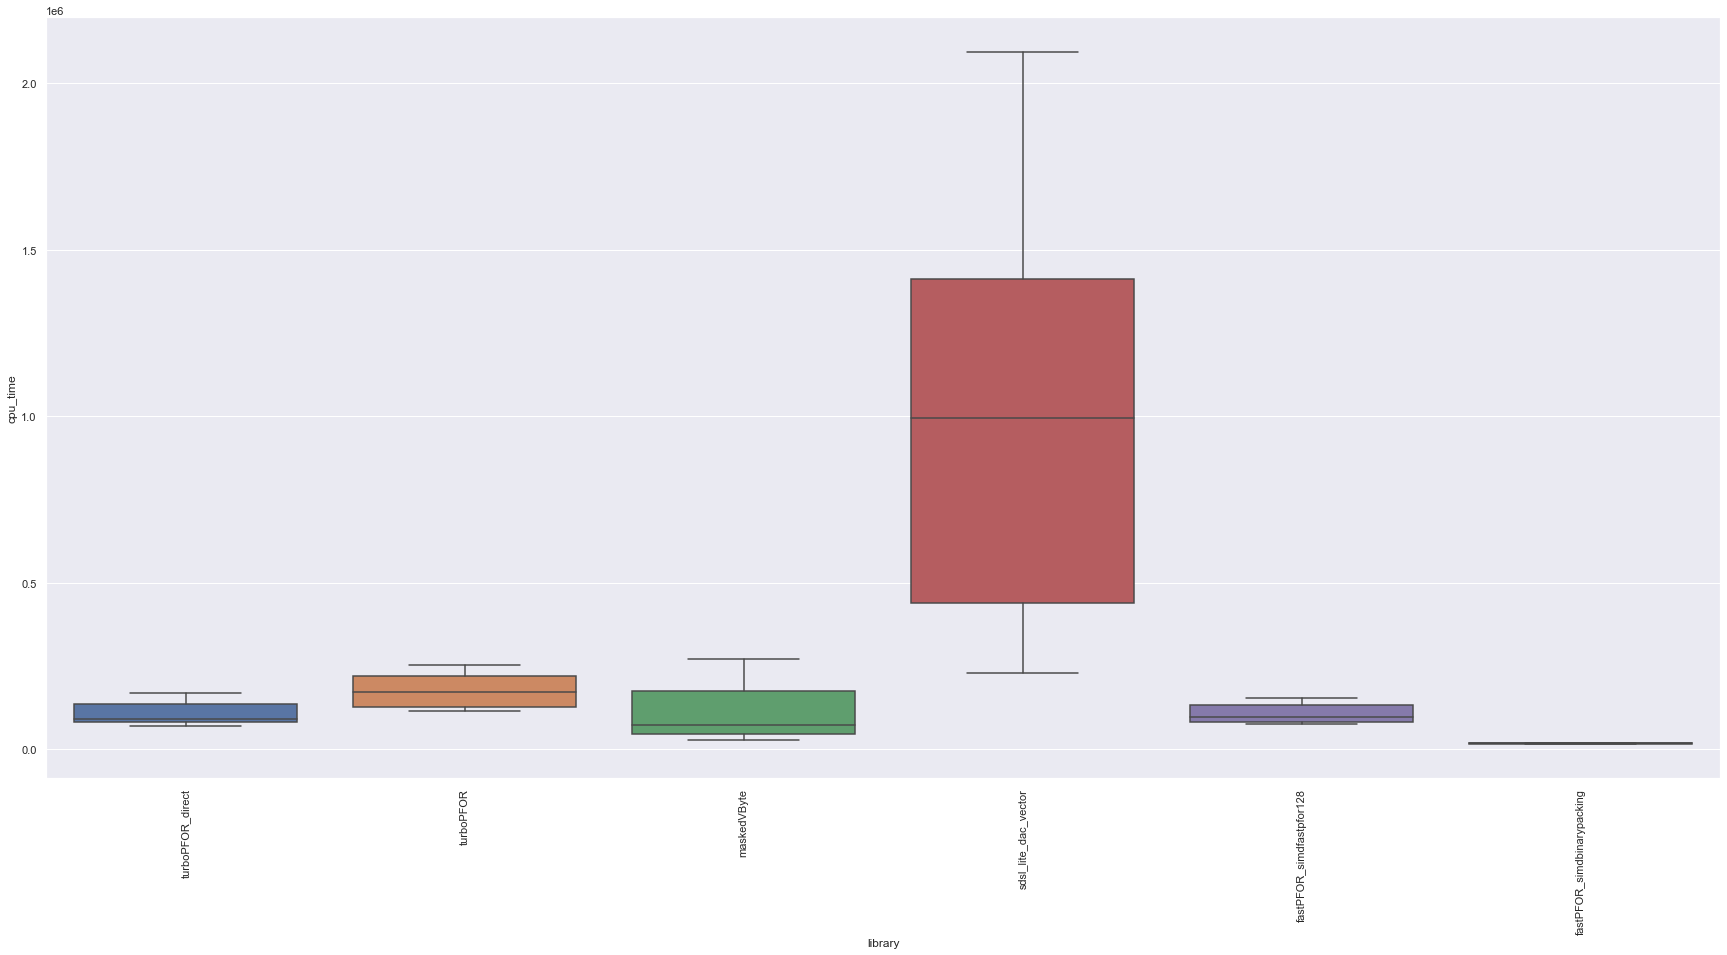

In [8]:
encoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Decoding

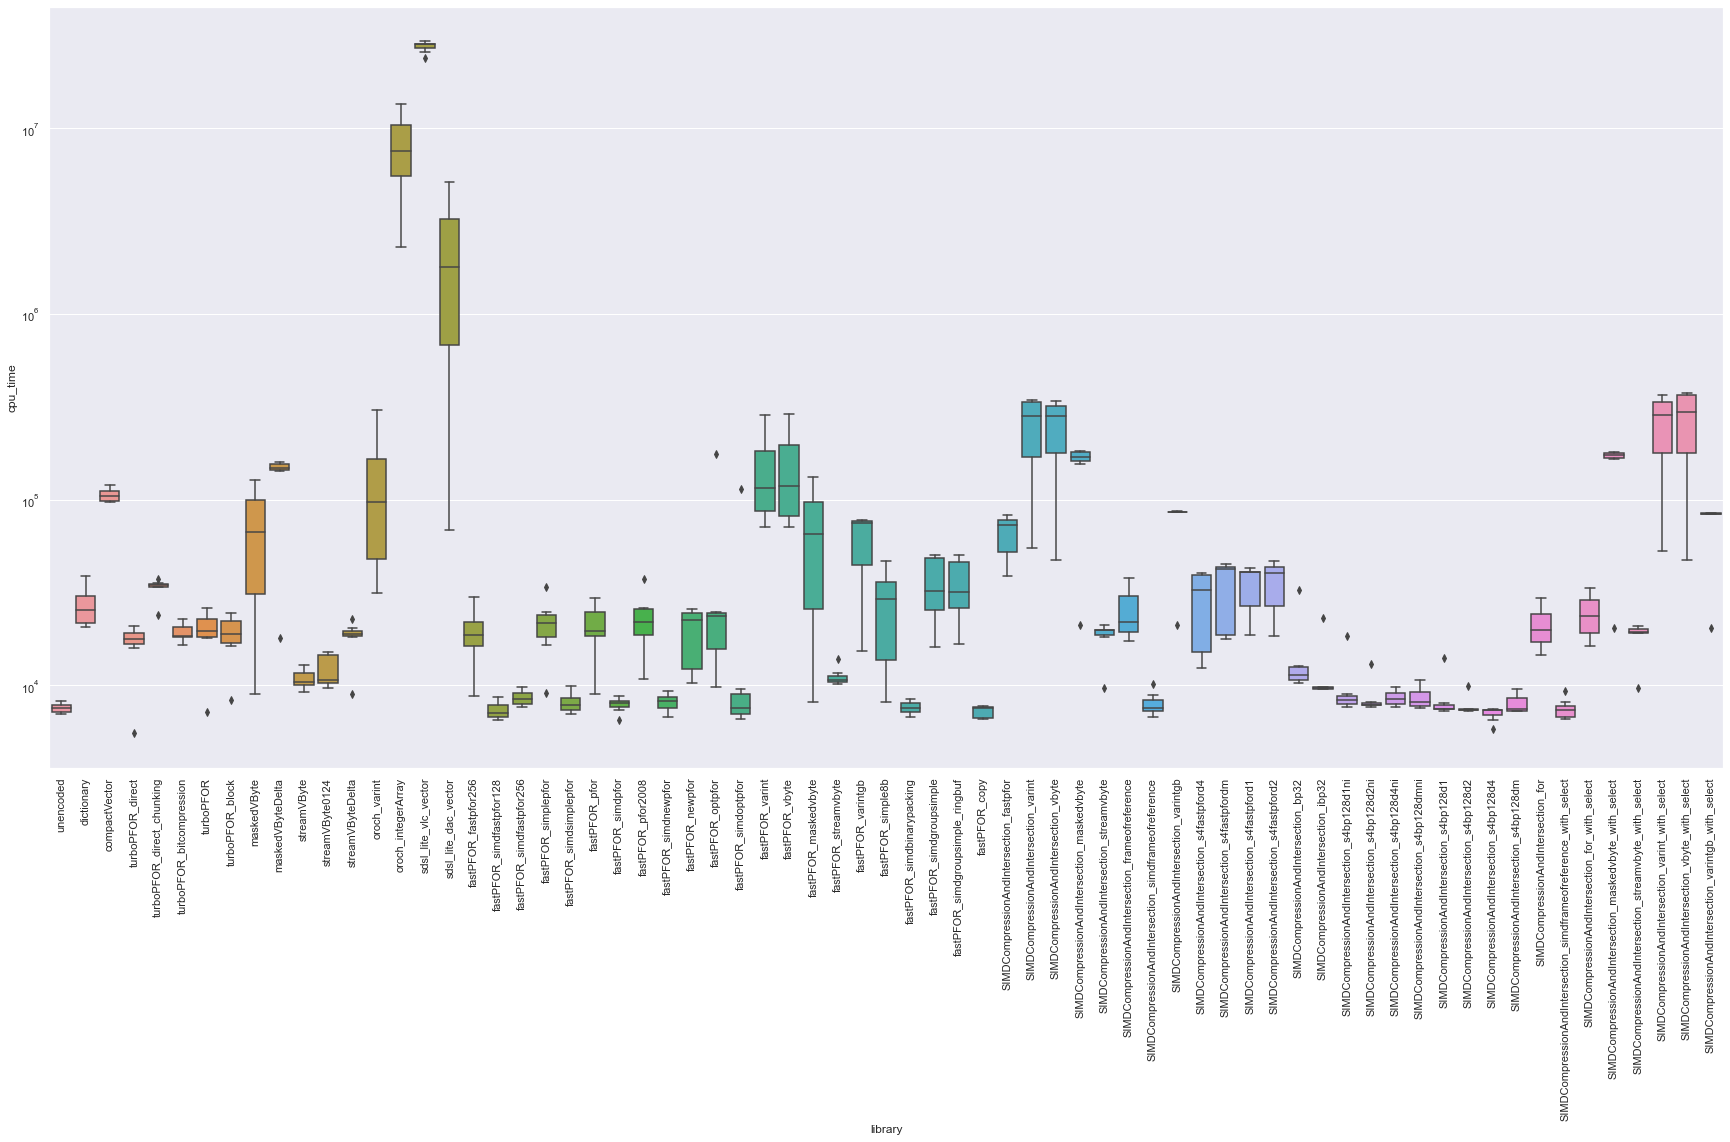

In [9]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Decoding (only fastest below 10^4)

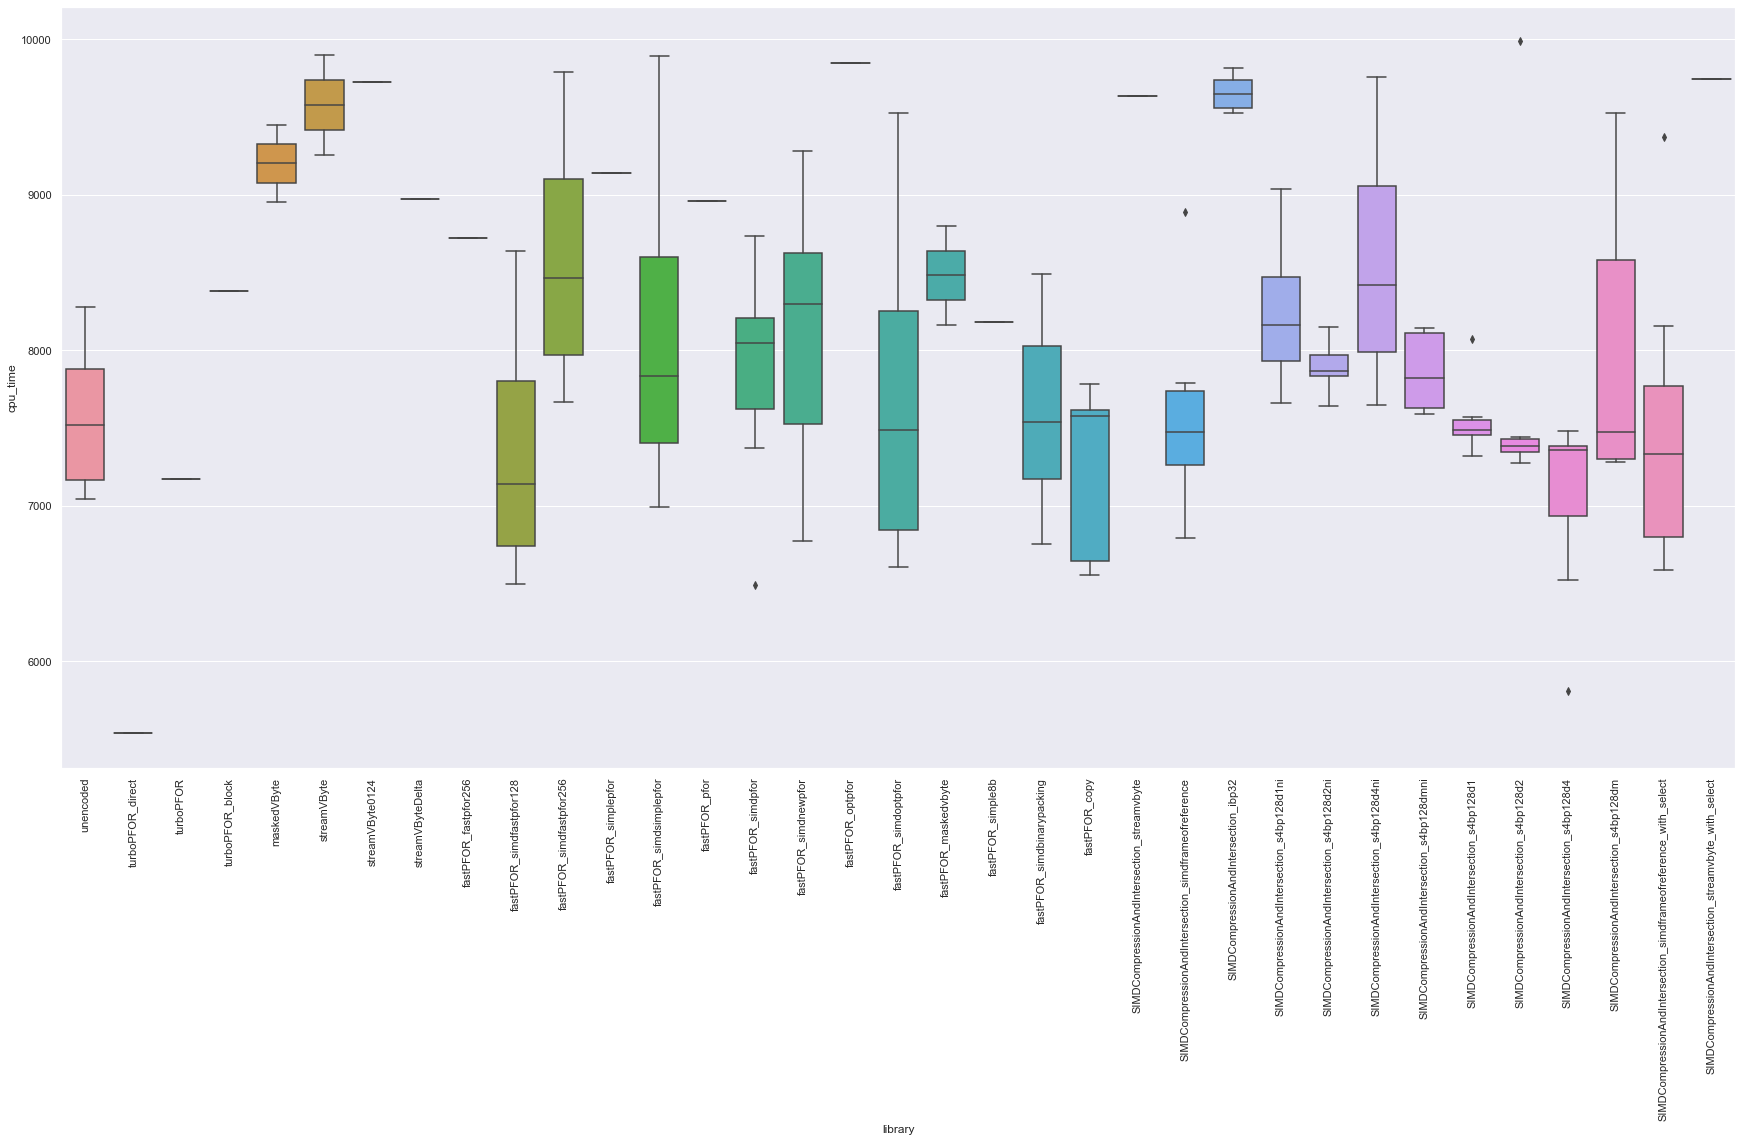

In [10]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["cpu_time"] < 10000]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Point based decoding

av_numbers


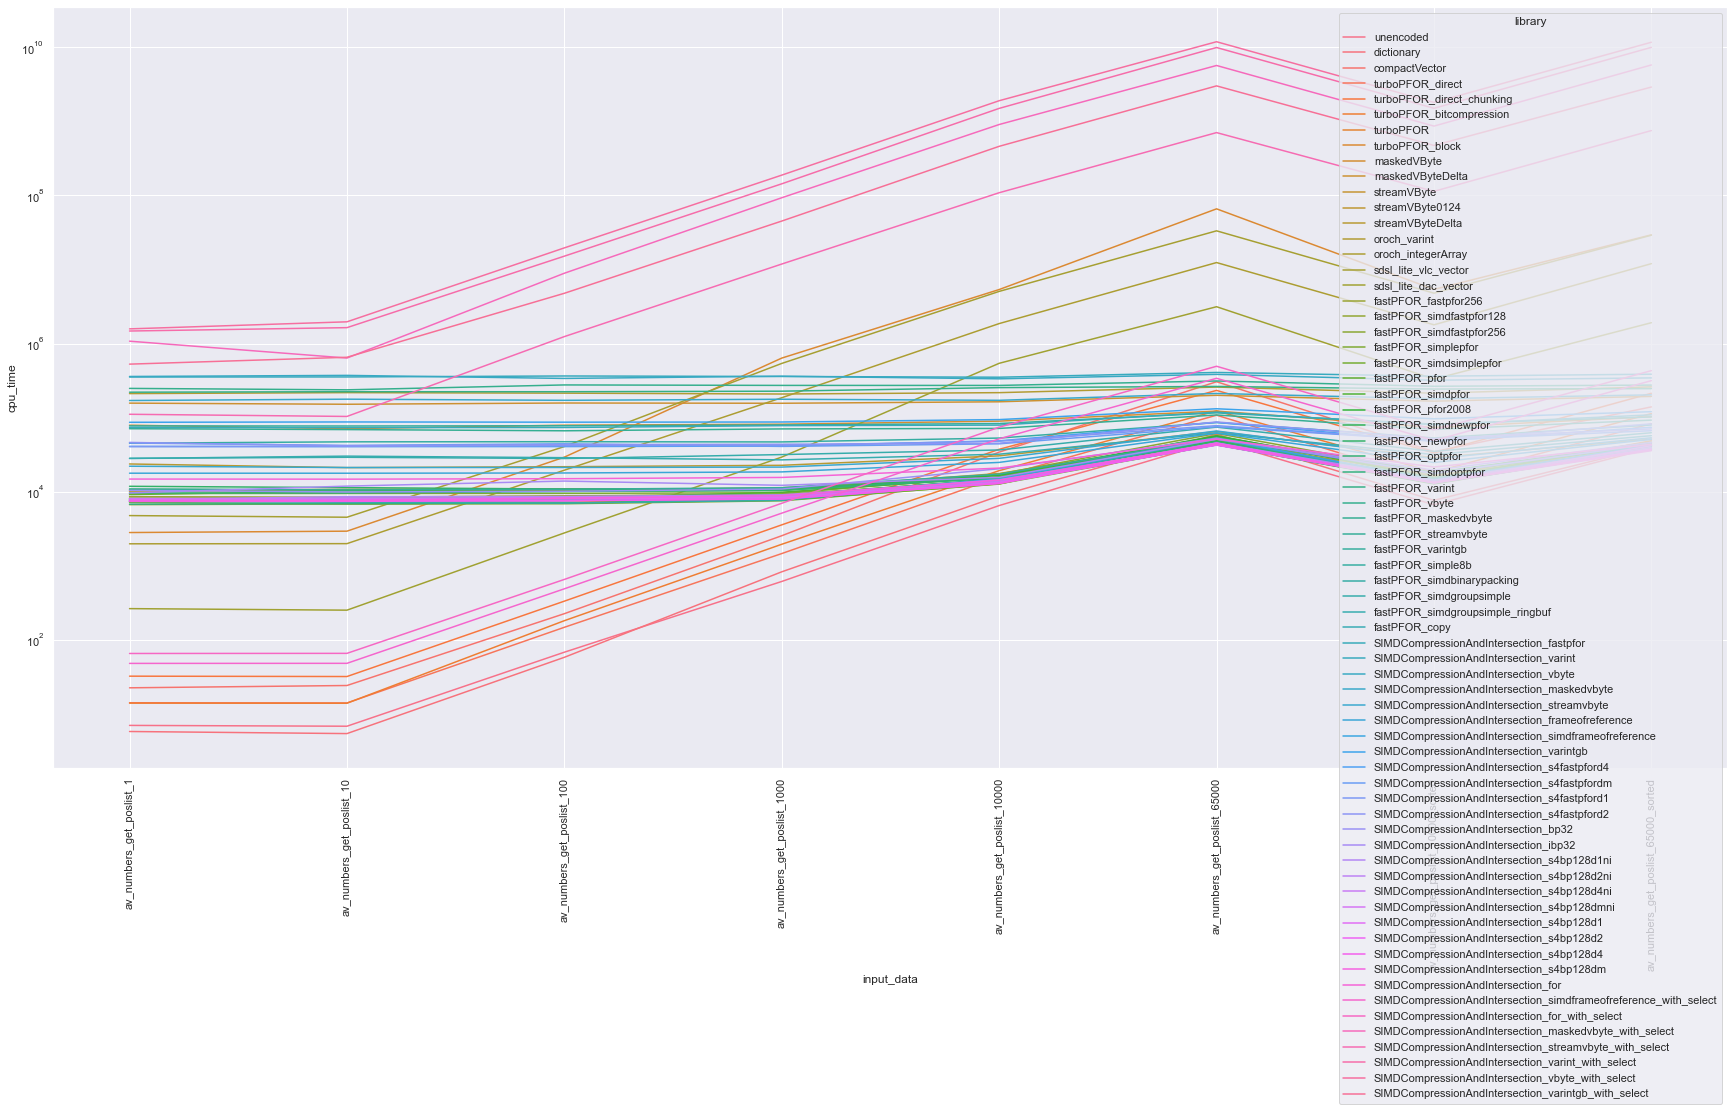

month_categorical


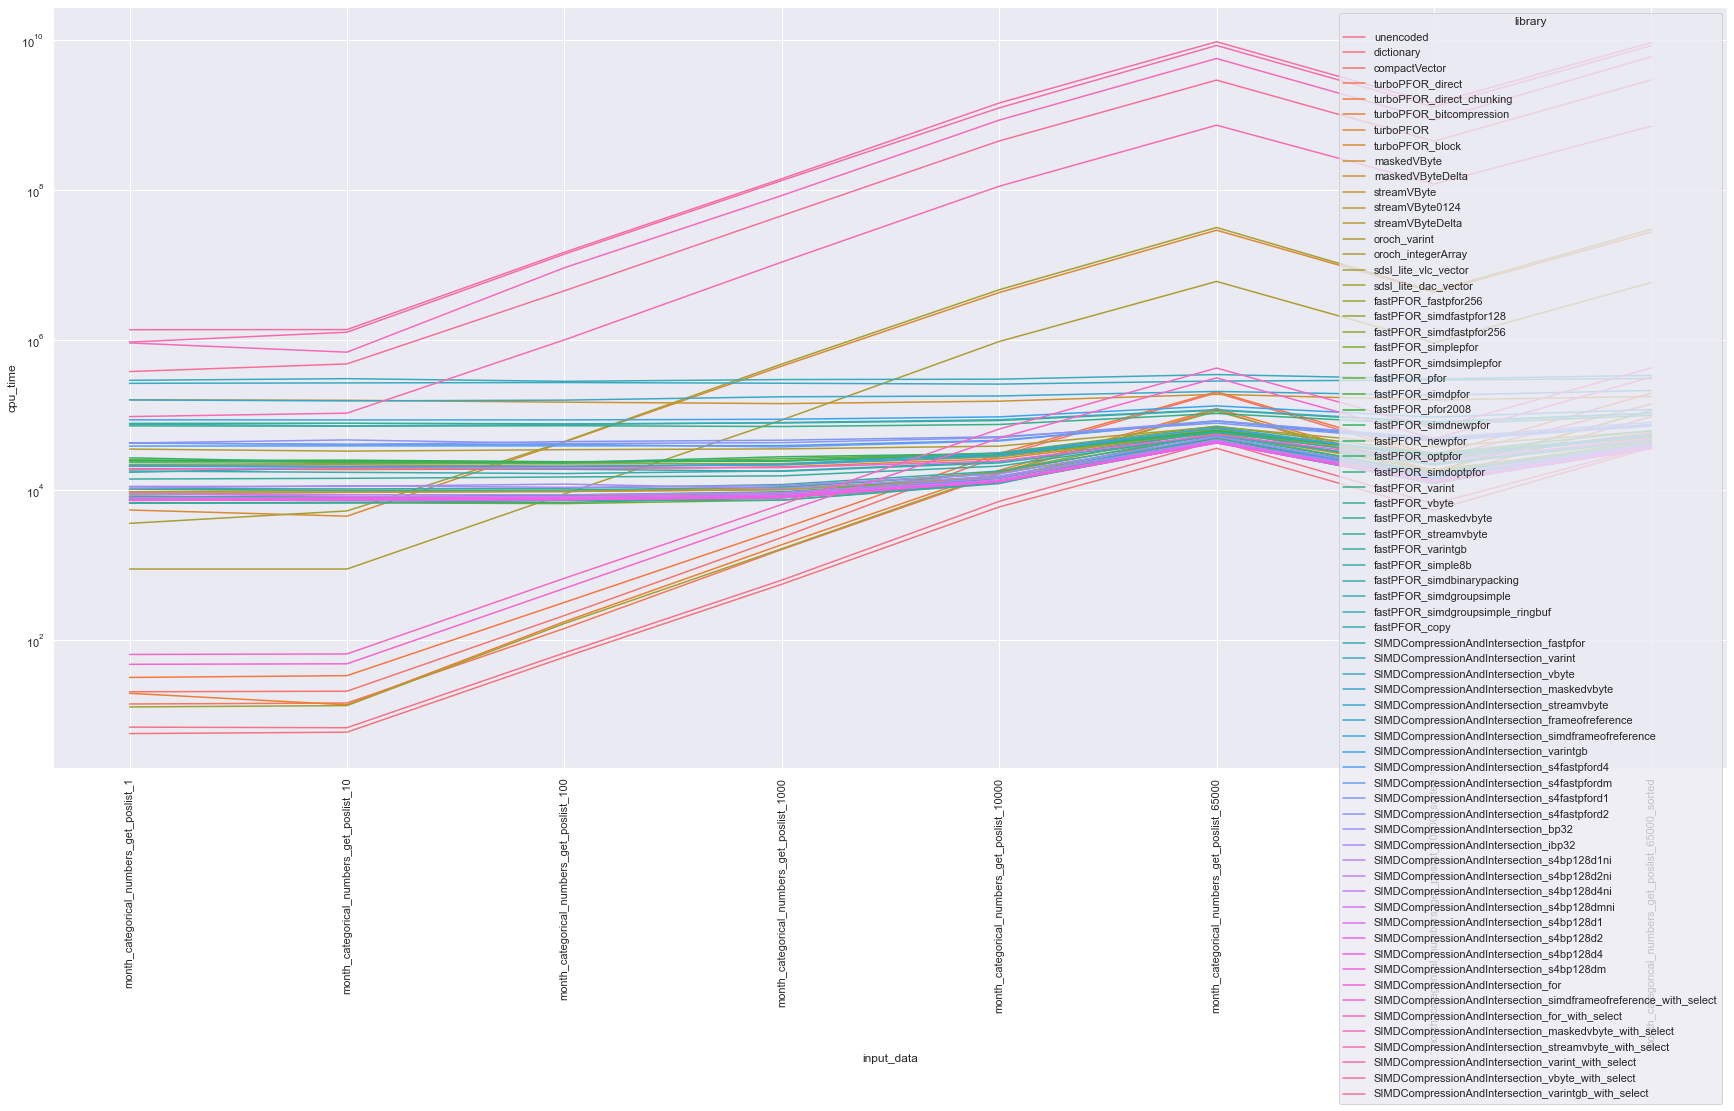

In [11]:
for data_distrib in ["av_numbers", "month_categorical"]:
    print(data_distrib)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points_nocopy"]
    av_decoding_points = decoding_points[decoding_points["input_data"].str.contains(data_distrib)]
    plot: sns.lineplot = sns.lineplot(data=av_decoding_points, x="input_data", y="cpu_time", hue="library")
    plot.set_yscale("log")
    plt.draw()
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## point decoding libs

fast random access libs:  ['unencoded', 'dictionary', 'compactVector', 'turboPFOR_direct', 'turboPFOR_direct_chunking', 'turboPFOR_bitcompression', 'SIMDCompressionAndIntersection_simdframeofreference_with_select', 'SIMDCompressionAndIntersection_for_with_select']


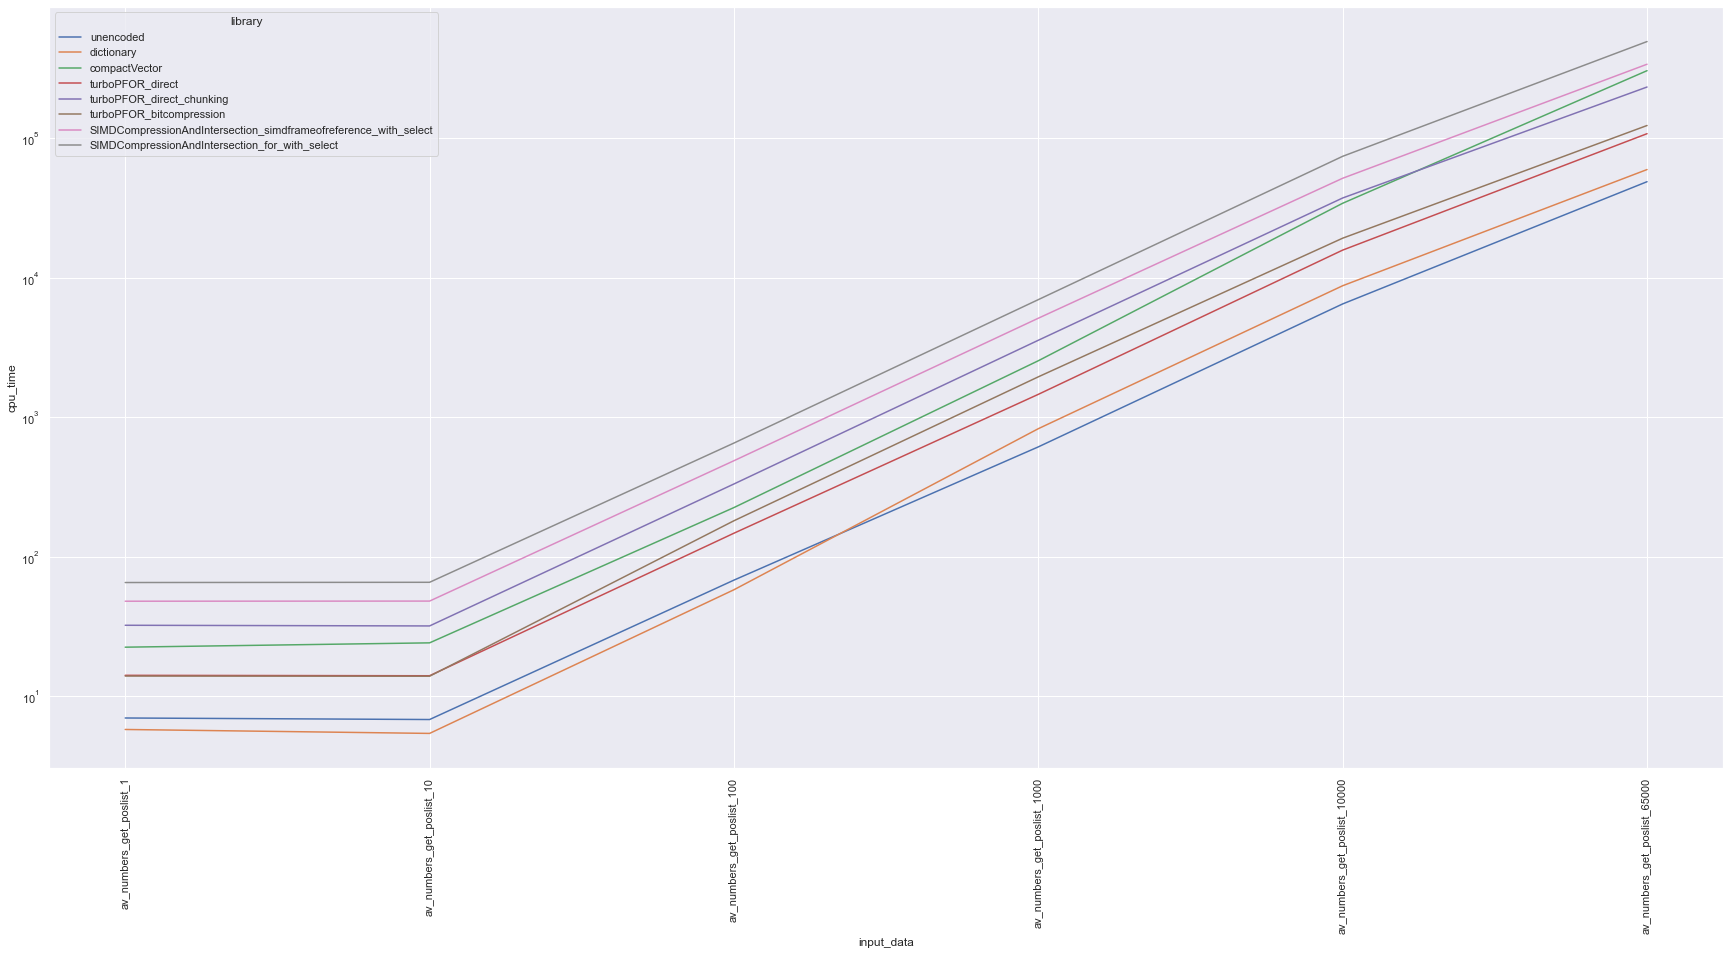

slow random access libs:  ['SIMDCompressionAndIntersection_maskedvbyte_with_select', 'SIMDCompressionAndIntersection_varint_with_select', 'SIMDCompressionAndIntersection_vbyte_with_select']


<function matplotlib.pyplot.show(close=None, block=None)>

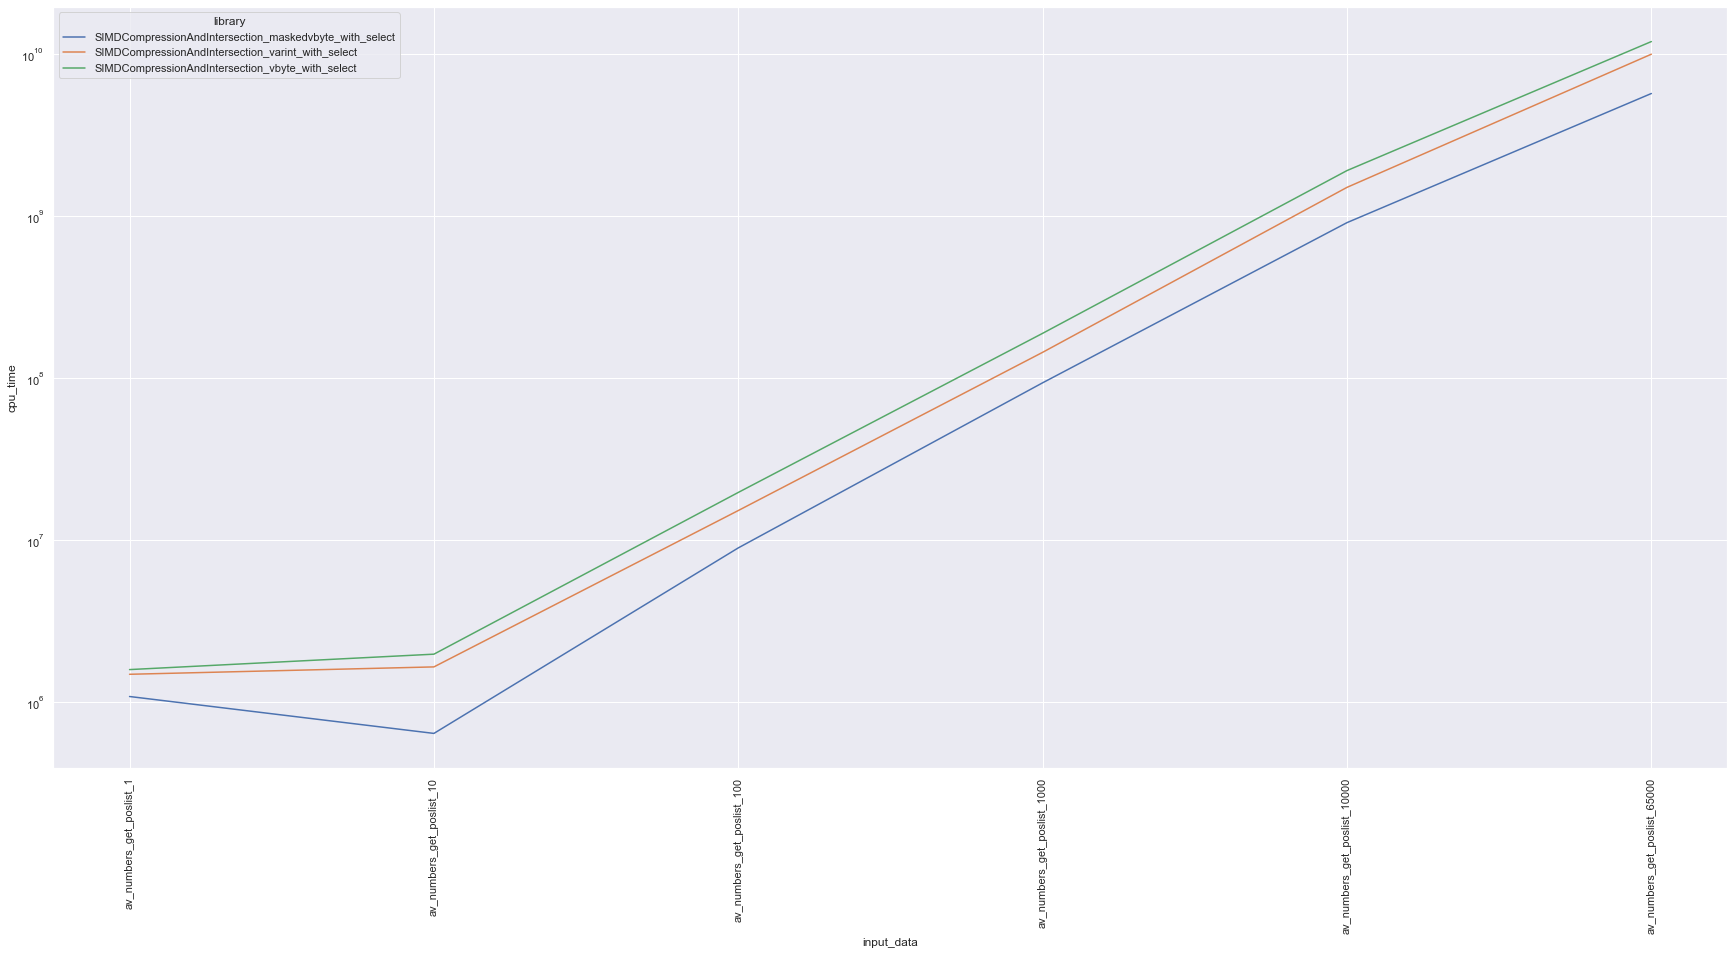

In [12]:
decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points_nocopy"]
av_decoding_points = decoding_points[decoding_points["input_data"].str.contains("av_numbers")][~decoding_points["input_data"].str.contains("sort")]

single_value_decodings = decoding_points[decoding_points["input_data"].str.fullmatch("av_numbers_get_poslist_1")]
fast_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] < 100]["library"])
slow_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] > 1000000]["library"])

print("fast random access libs: ", fast_random_access_libs)
fastest_points = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.show()

print("slow random access libs: ", slow_random_access_libs)
fastest_points = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(slow_random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.show

## Decoding Point Based (only random access libs, detailed view for accessing 10000 out of 65000 points)

av_numbers_get_poslist_100


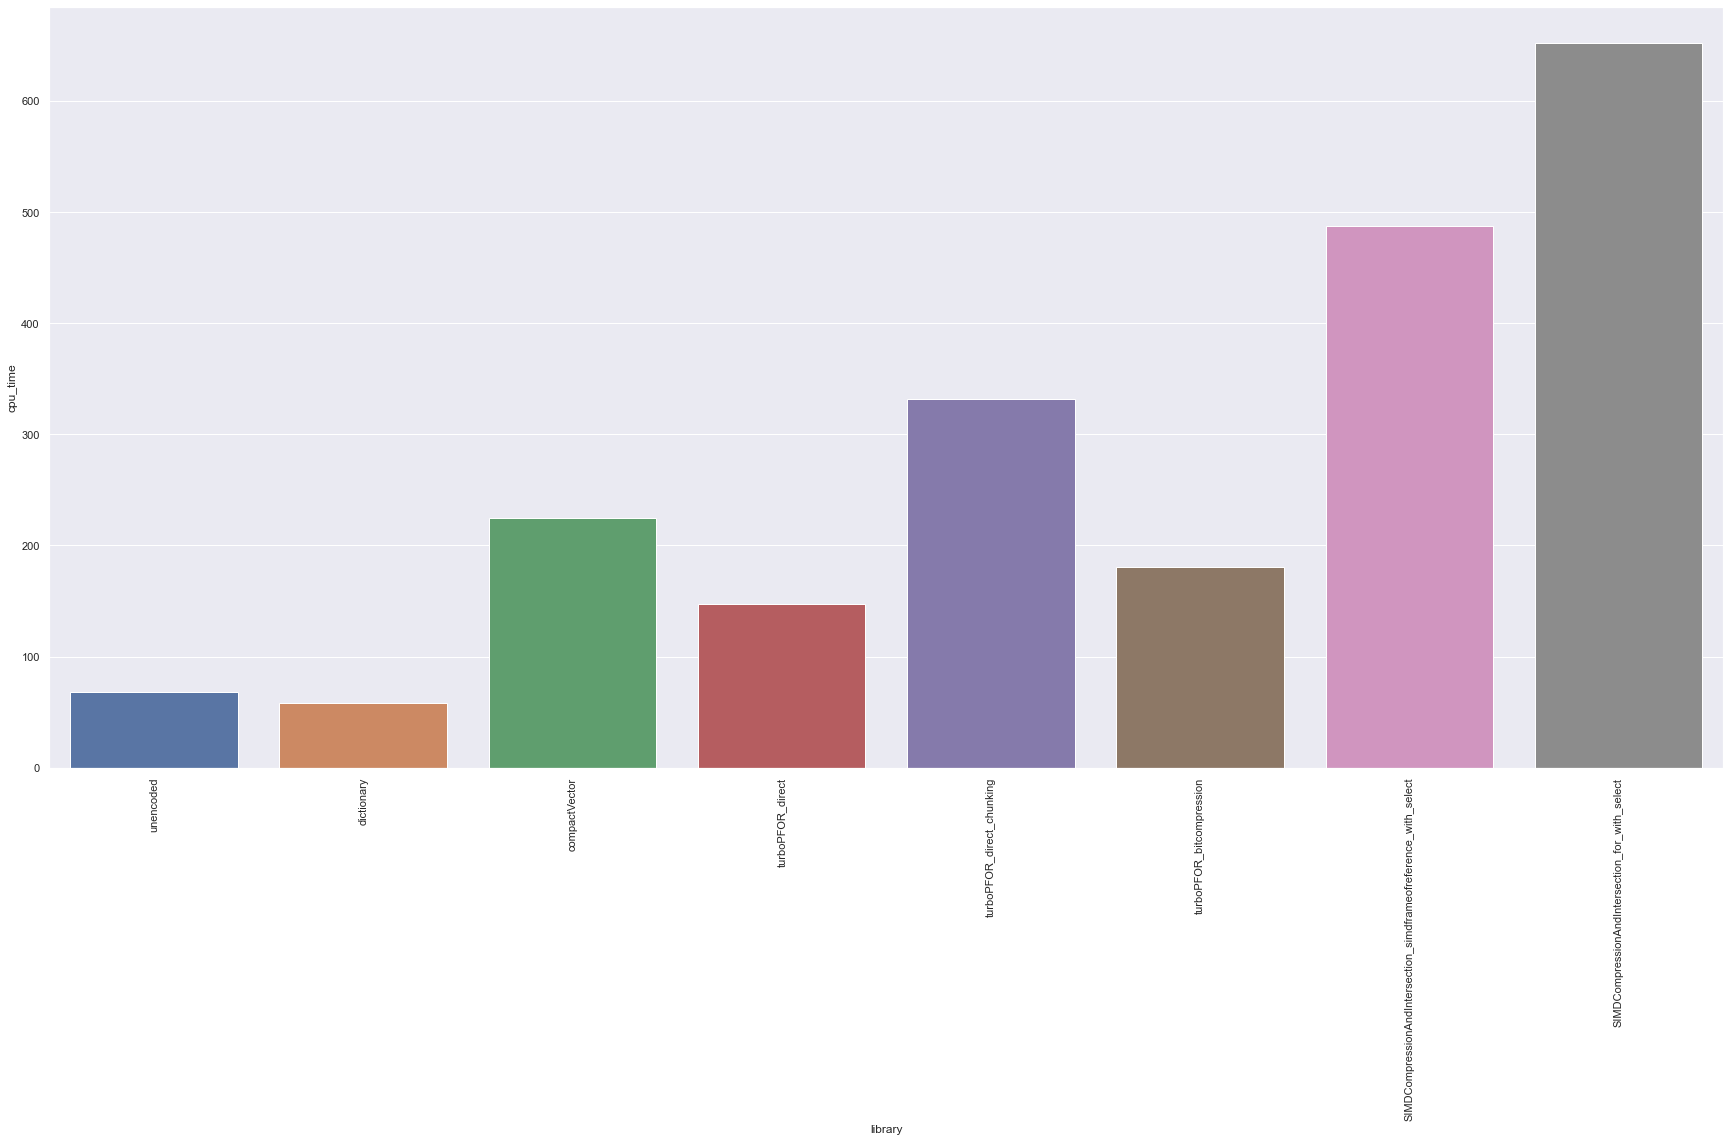

av_numbers_get_poslist_10000


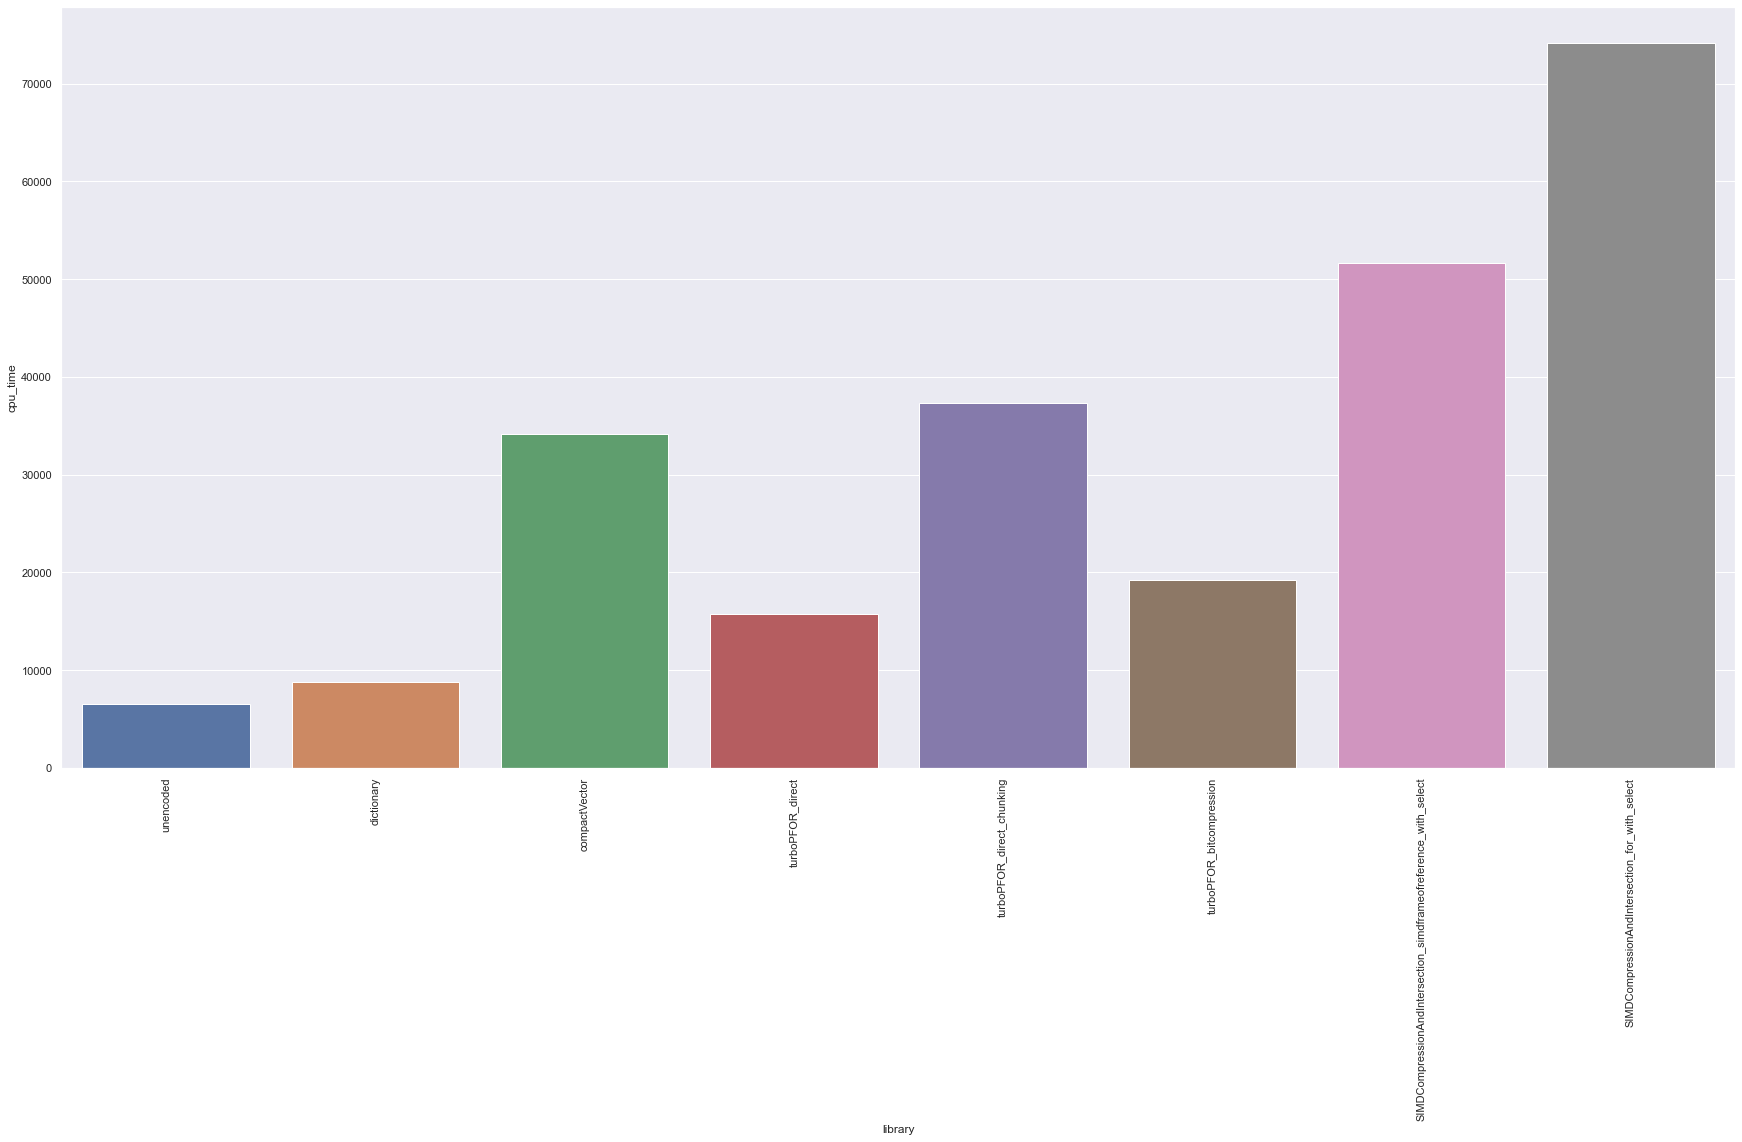

In [13]:
 for poslist_length in ["av_numbers_get_poslist_100", "av_numbers_get_poslist_10000"]:
    print(poslist_length)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"].str.contains("decoding_points_nocopy")]
    fastest_points = decoding_points.loc[decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
    fastest_points = fastest_points.loc[fastest_points["input_data"] == poslist_length]
    plot: sns.lineplot = sns.barplot(data=fastest_points, x="library", y="cpu_time")
    plot.set_yscale("linear")
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## Sequential decoding speed of random access libs

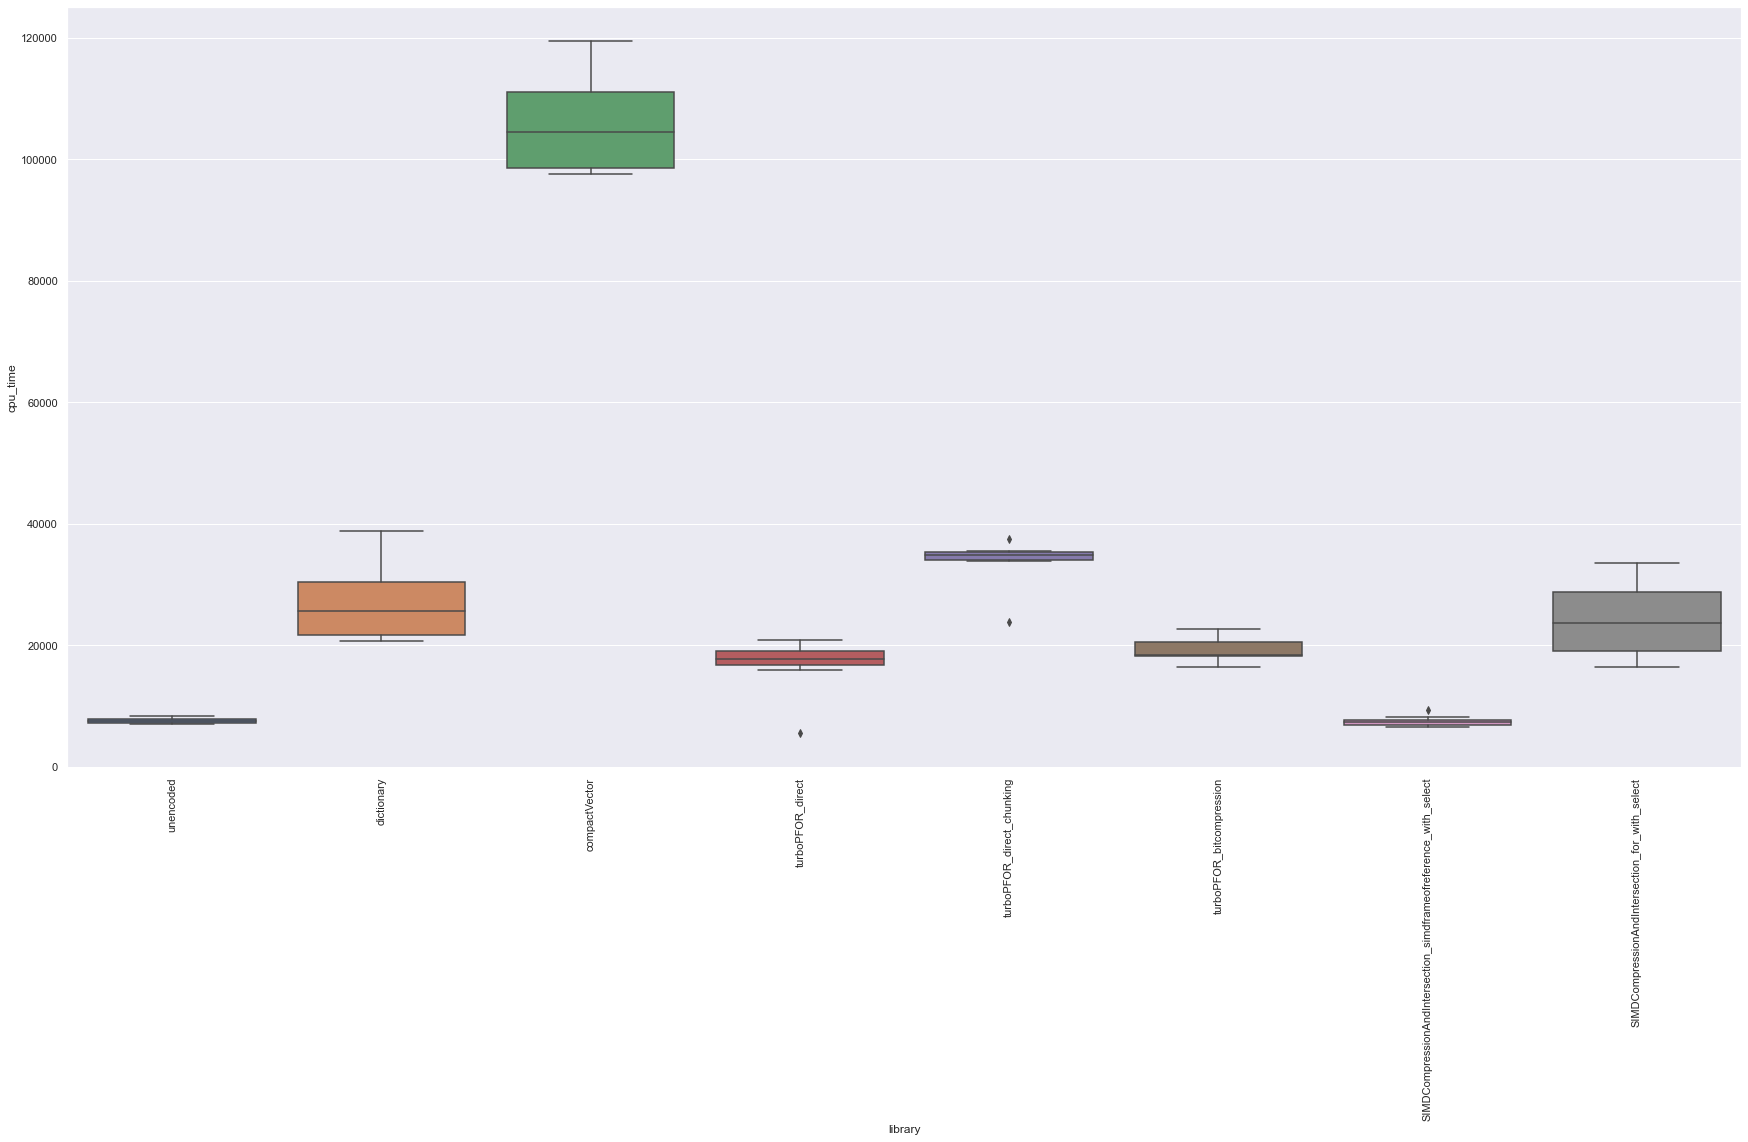

In [14]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["library"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## compression rates of fast random access libs (mean across all data distributions)

In [15]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
fast_point_compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]

def avgBitsPerInt(group):
    group["avgBitsPerInt"] = group["bitsPerInt"].mean()
    return group
fast_point_compression_stats = fast_point_compression_stats.groupby("name").apply(avgBitsPerInt)

plot = sns.barplot(data=fast_point_compression_stats, x="name", y="avgBitsPerInt")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# todo: sort by same order

[Text(0, 0, 'unencoded'),
 Text(1, 0, 'dictionary'),
 Text(2, 0, 'compactVector'),
 Text(3, 0, 'turboPFOR_direct'),
 Text(4, 0, 'turboPFOR_direct_chunking'),
 Text(5, 0, 'turboPFOR_bitcompression'),
 Text(6, 0, 'SIMDCompressionAndIntersection_simdframeofreference_with_select'),
 Text(7, 0, 'SIMDCompressionAndIntersection_for_with_select')]

## compression rates of fast random access libs

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

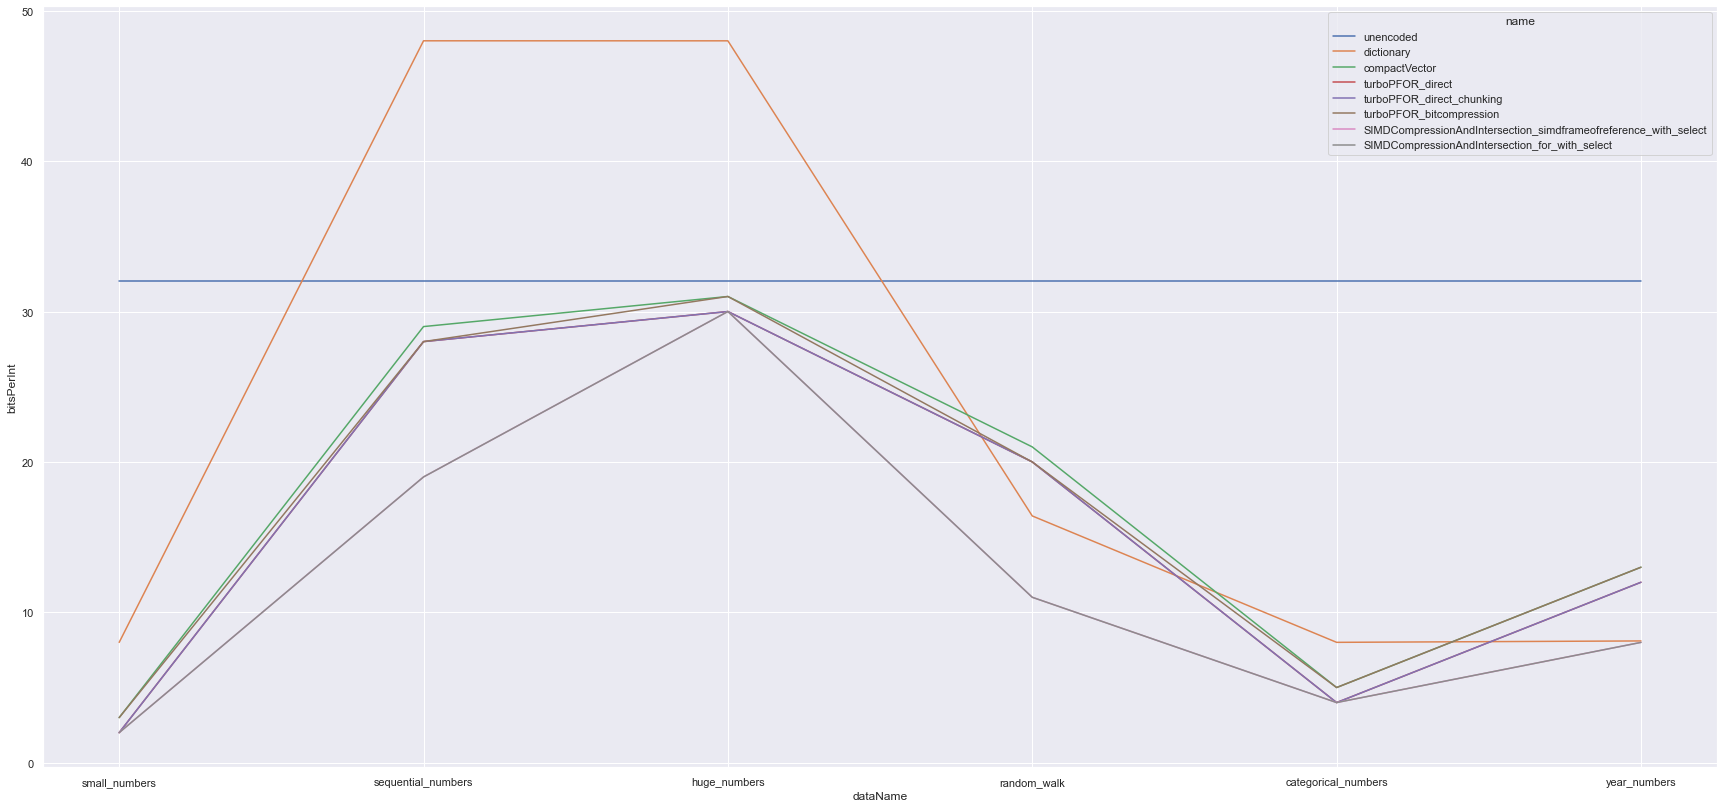

In [16]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

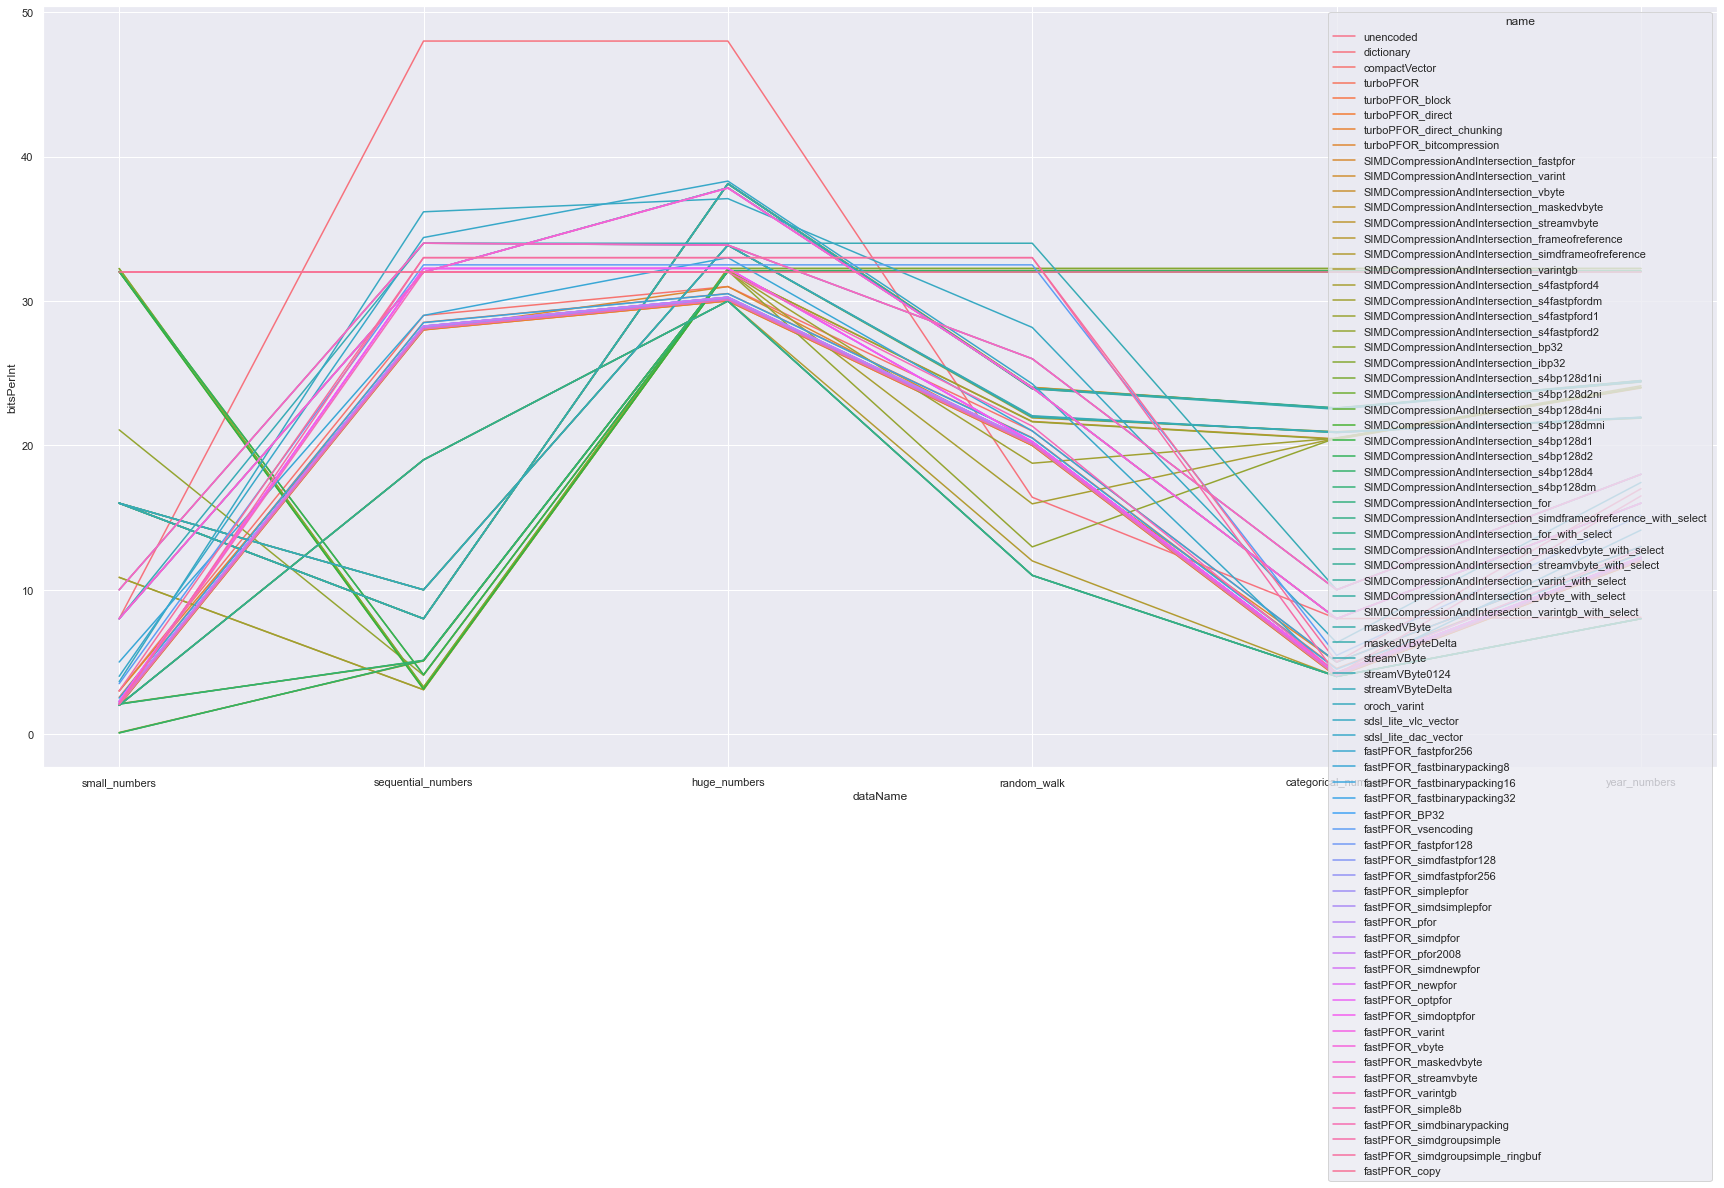

In [17]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (only smallest)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

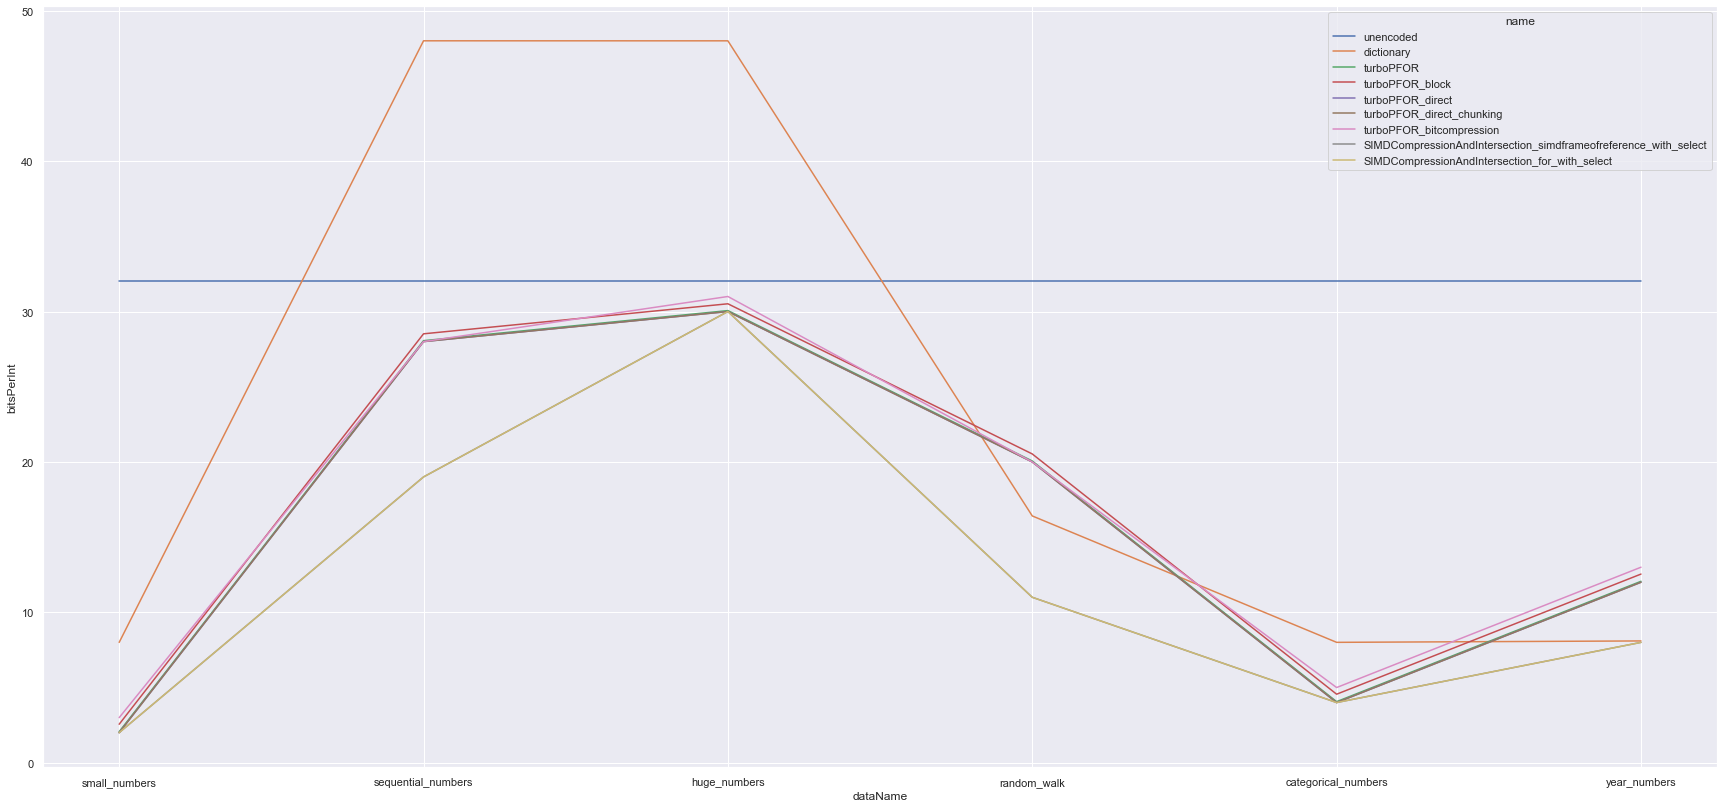

In [18]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(unencoded|dictionary|turboPFOR|Intersection_for_with_select|simdframeofreference_with).*")]

sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (interesting libs)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

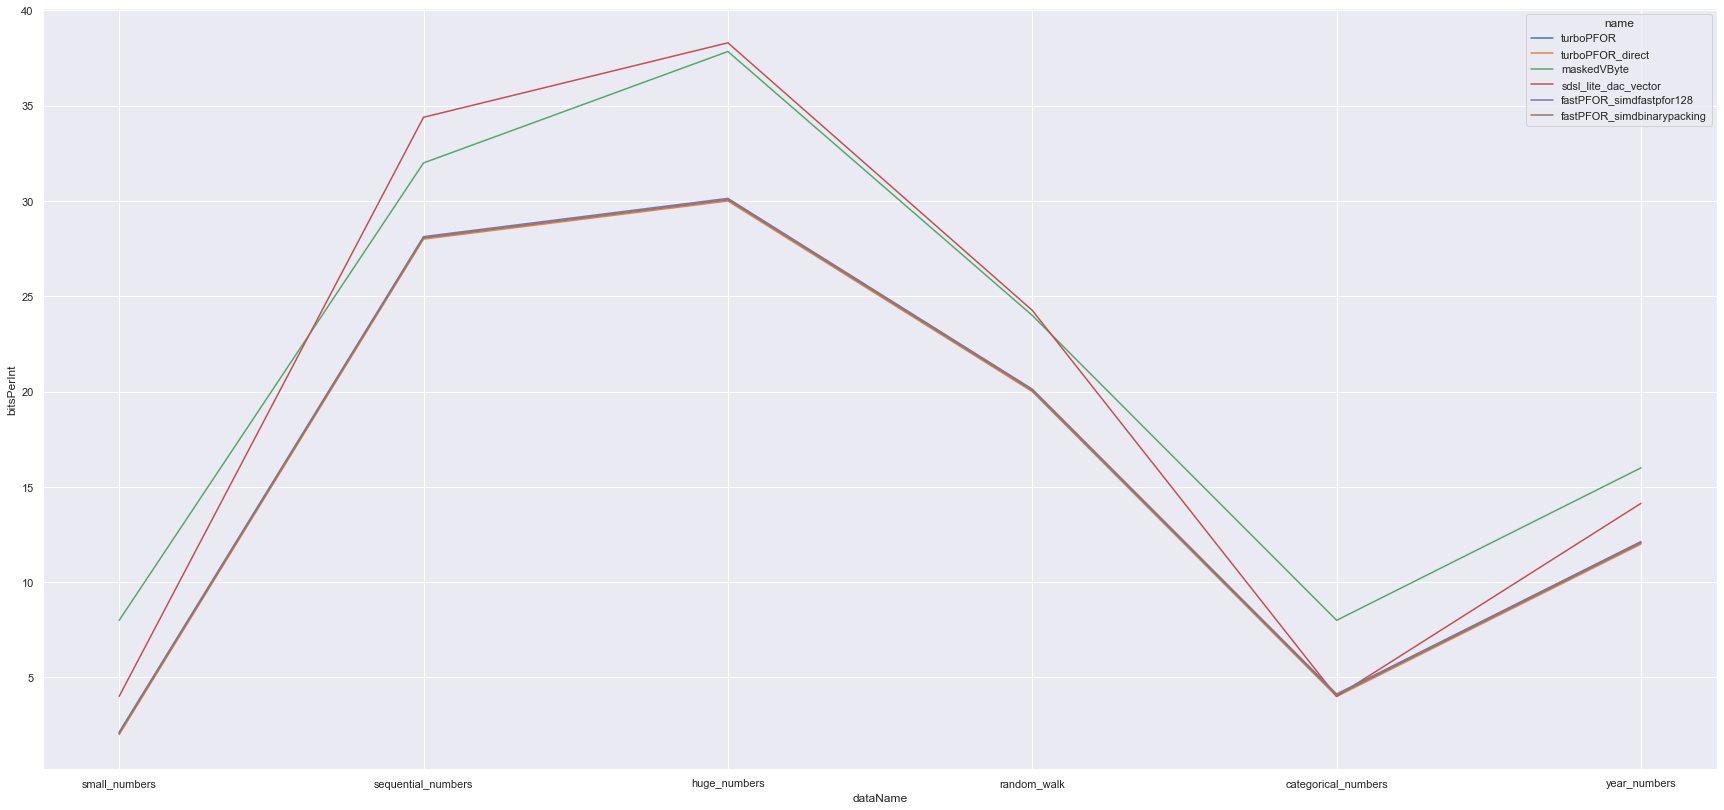

In [19]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats_filtered = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats_filtered, x="dataName", y="bitsPerInt", hue="name")

## Pareto

In [20]:
compression_stats["library"] = compression_stats["name"]
combined = benchmark_speeds.merge(compression_stats, left_on=["library", "input_data"], right_on=["library", "dataName"], how="inner")
combined = combined.loc[(combined["process_type"] == "encoding")] # we don't really care about encoding times (todo: proper weighting)

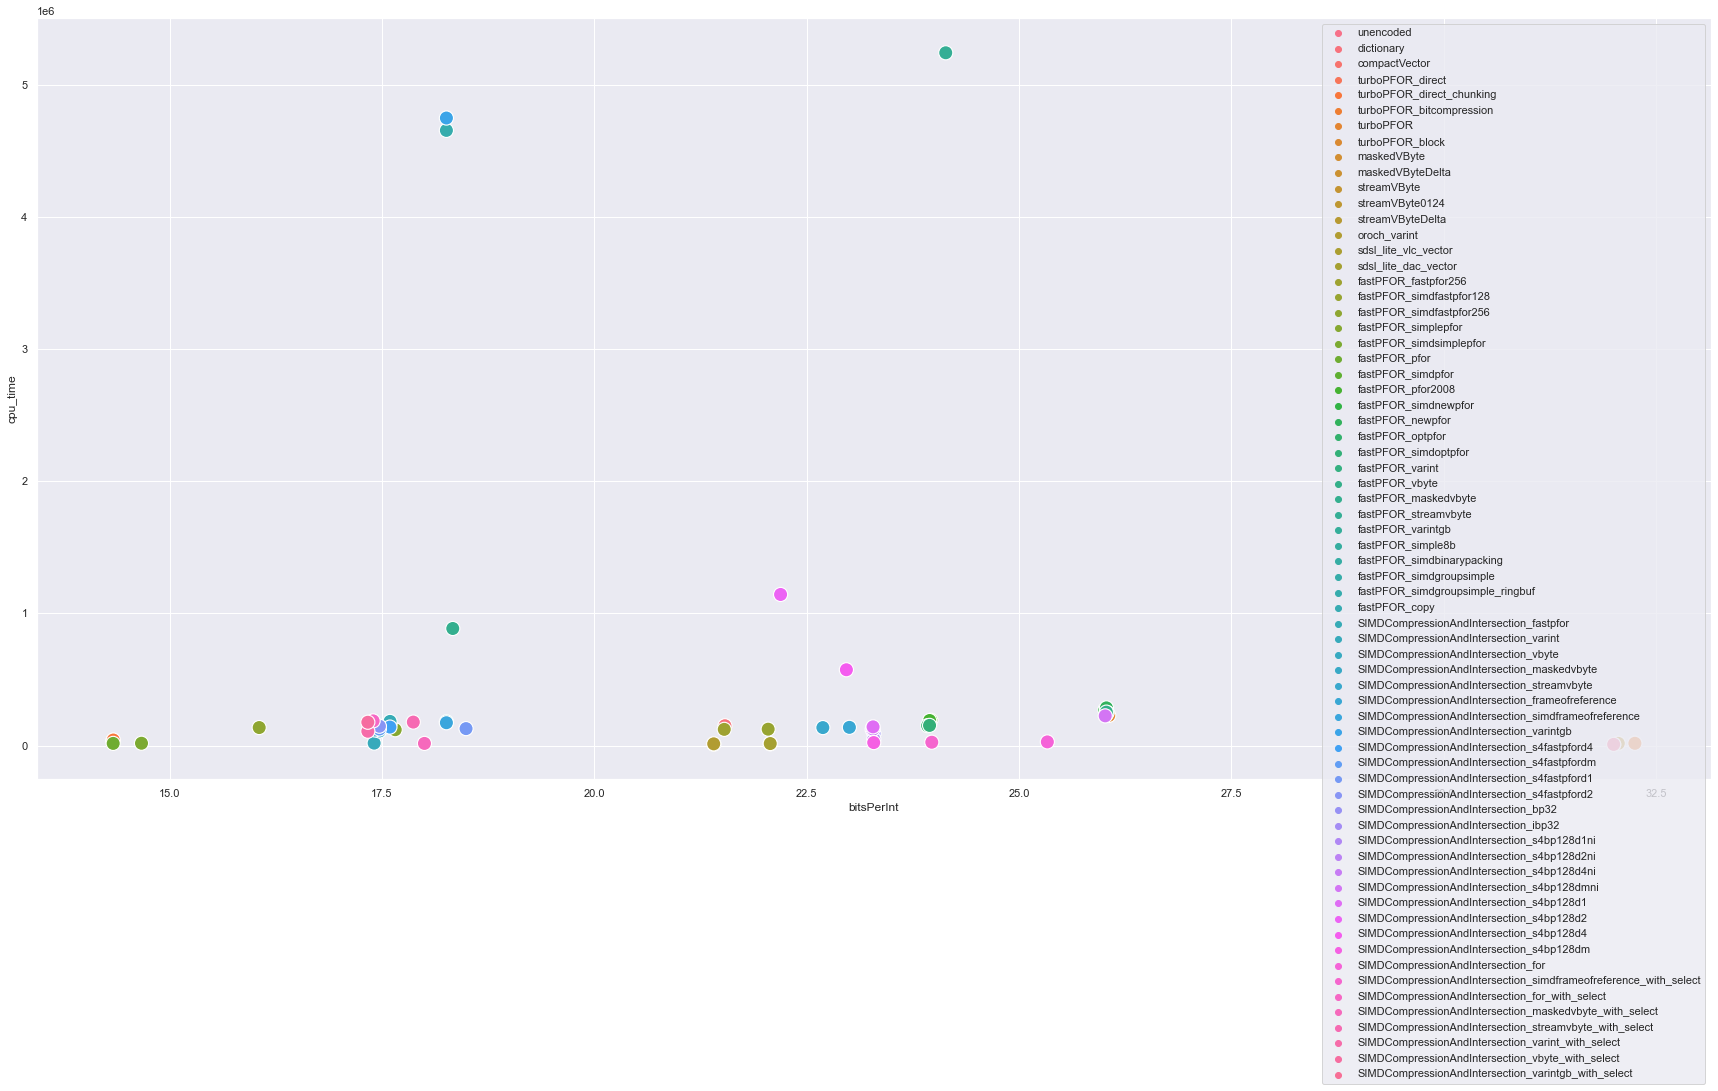

In [21]:
x = combined.groupby("library")['bitsPerInt'].mean()
y = combined.groupby("library")['cpu_time'].mean()
names = combined.library.unique()
plot = sns.scatterplot(x, y, hue=names, s=200)

## Pareto (interesting libs)

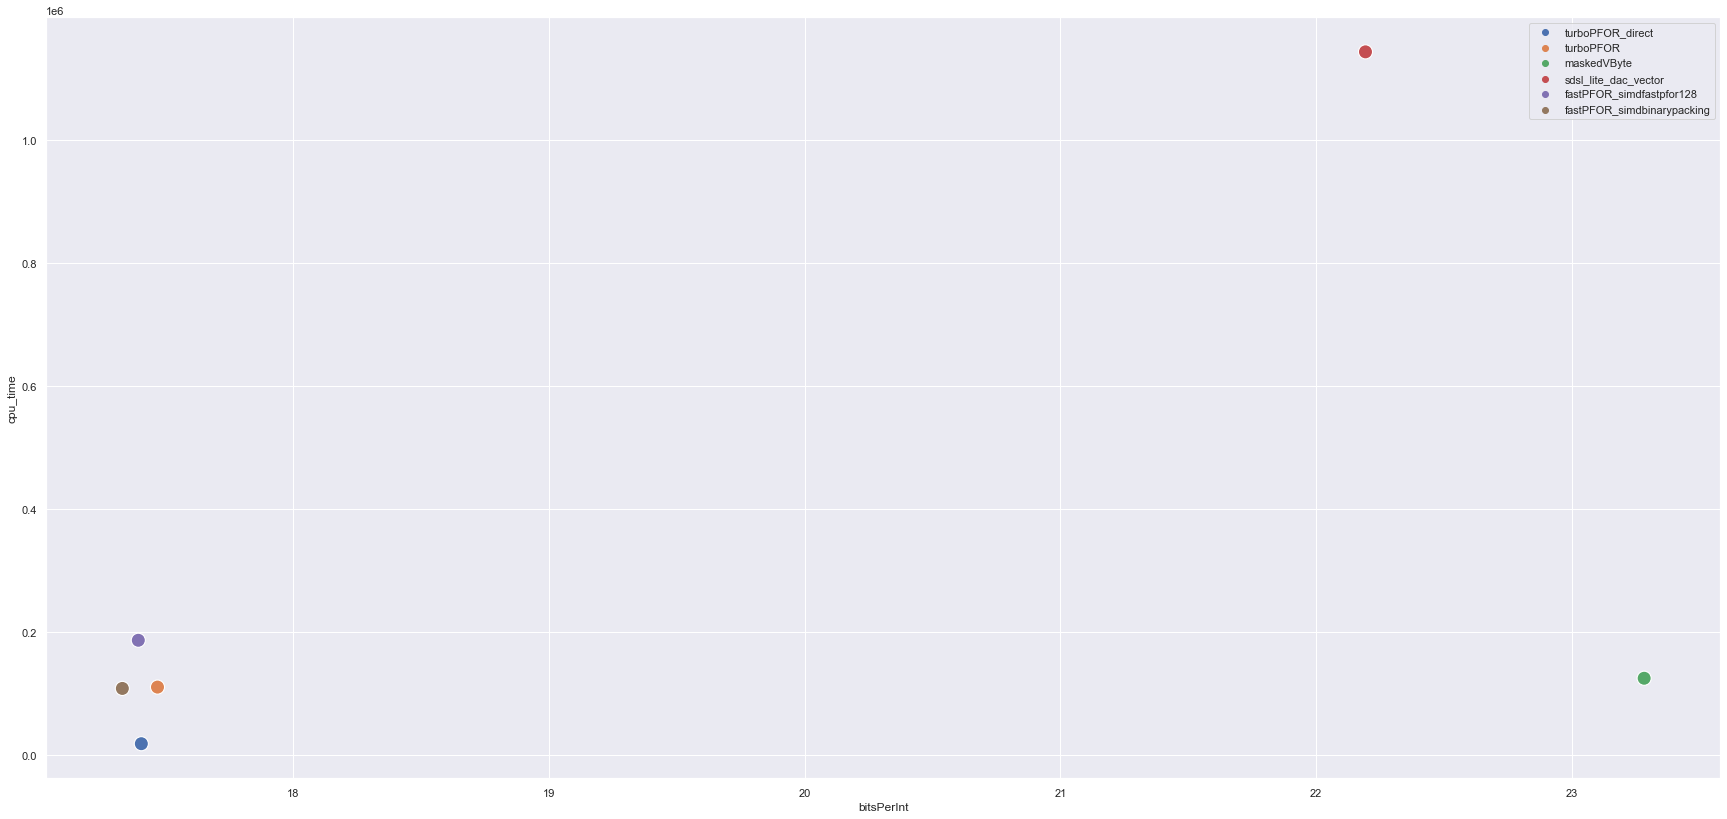

In [22]:
combined_filtered = combined.loc[(combined["library"].isin(most_interesting_libraries))]
x = combined_filtered.groupby("library")['bitsPerInt'].mean()
y = combined_filtered.groupby("library")['cpu_time'].mean()
plot = sns.scatterplot(x, y, hue=combined_filtered.library.unique(), s=200)

## Pareto (even more interesting libs :D)

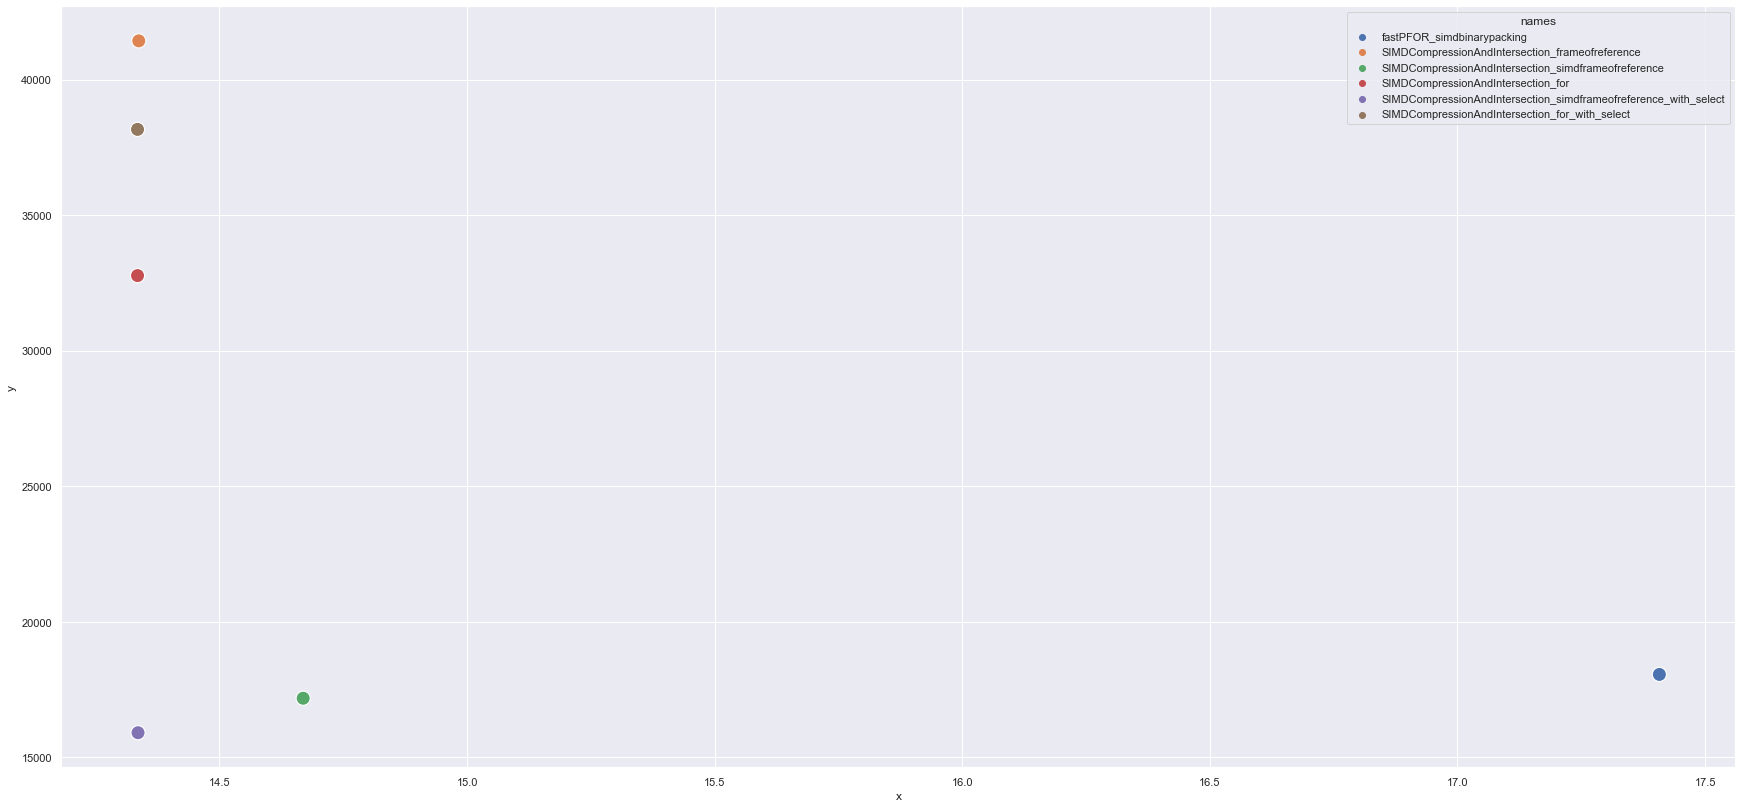

In [23]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.x < 17.7]
data = data[data.y < 50000]
#data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)


## Pareto (even more interesting libs :D)

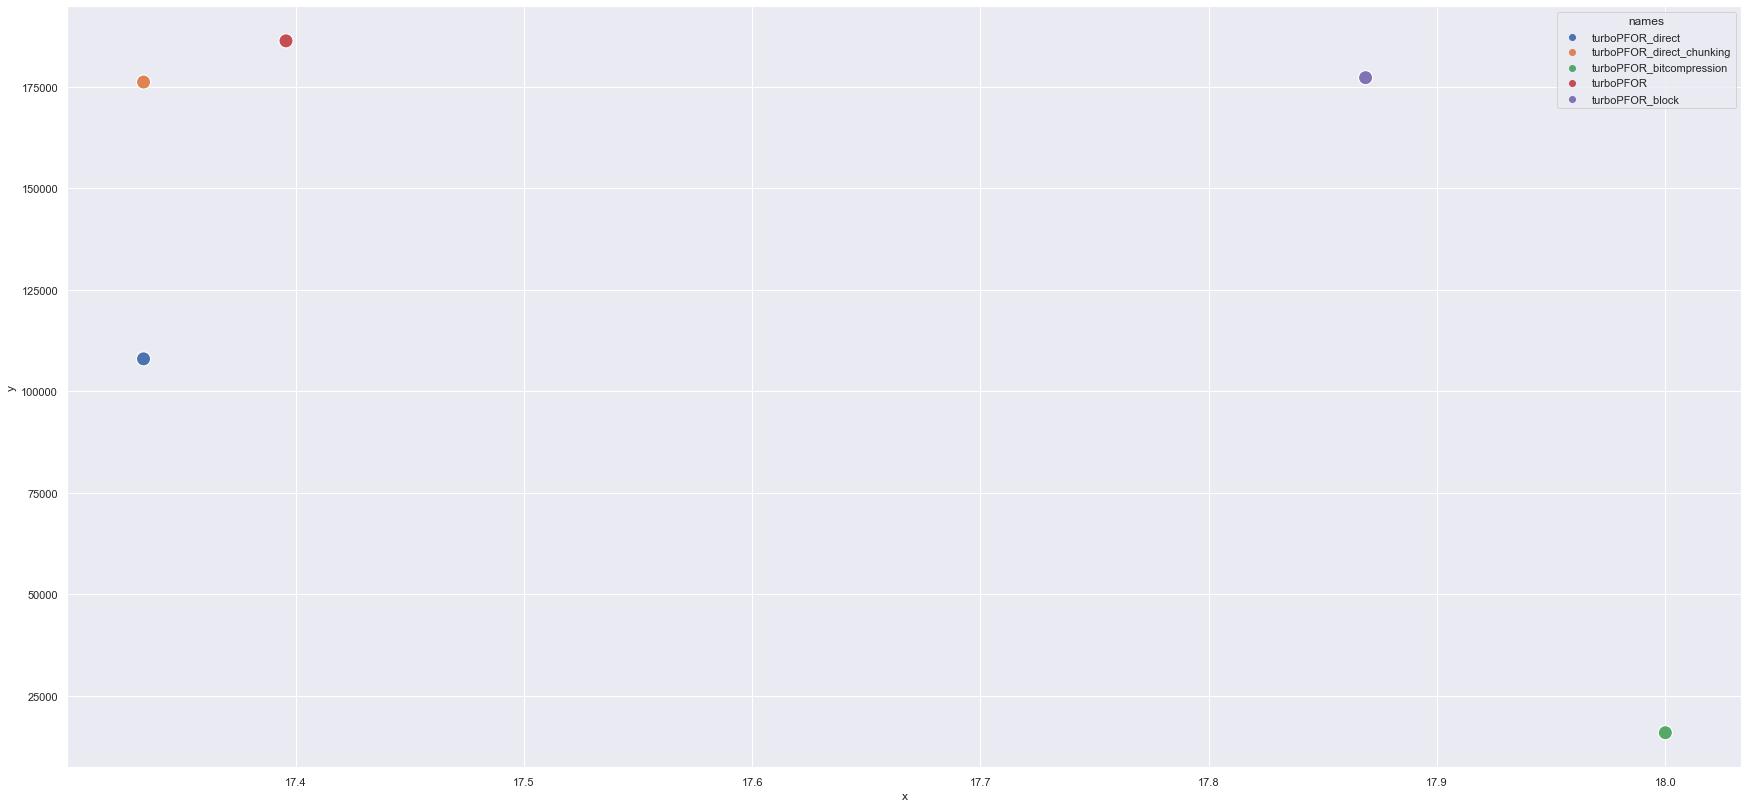

In [24]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)

## Copy vs nocopy

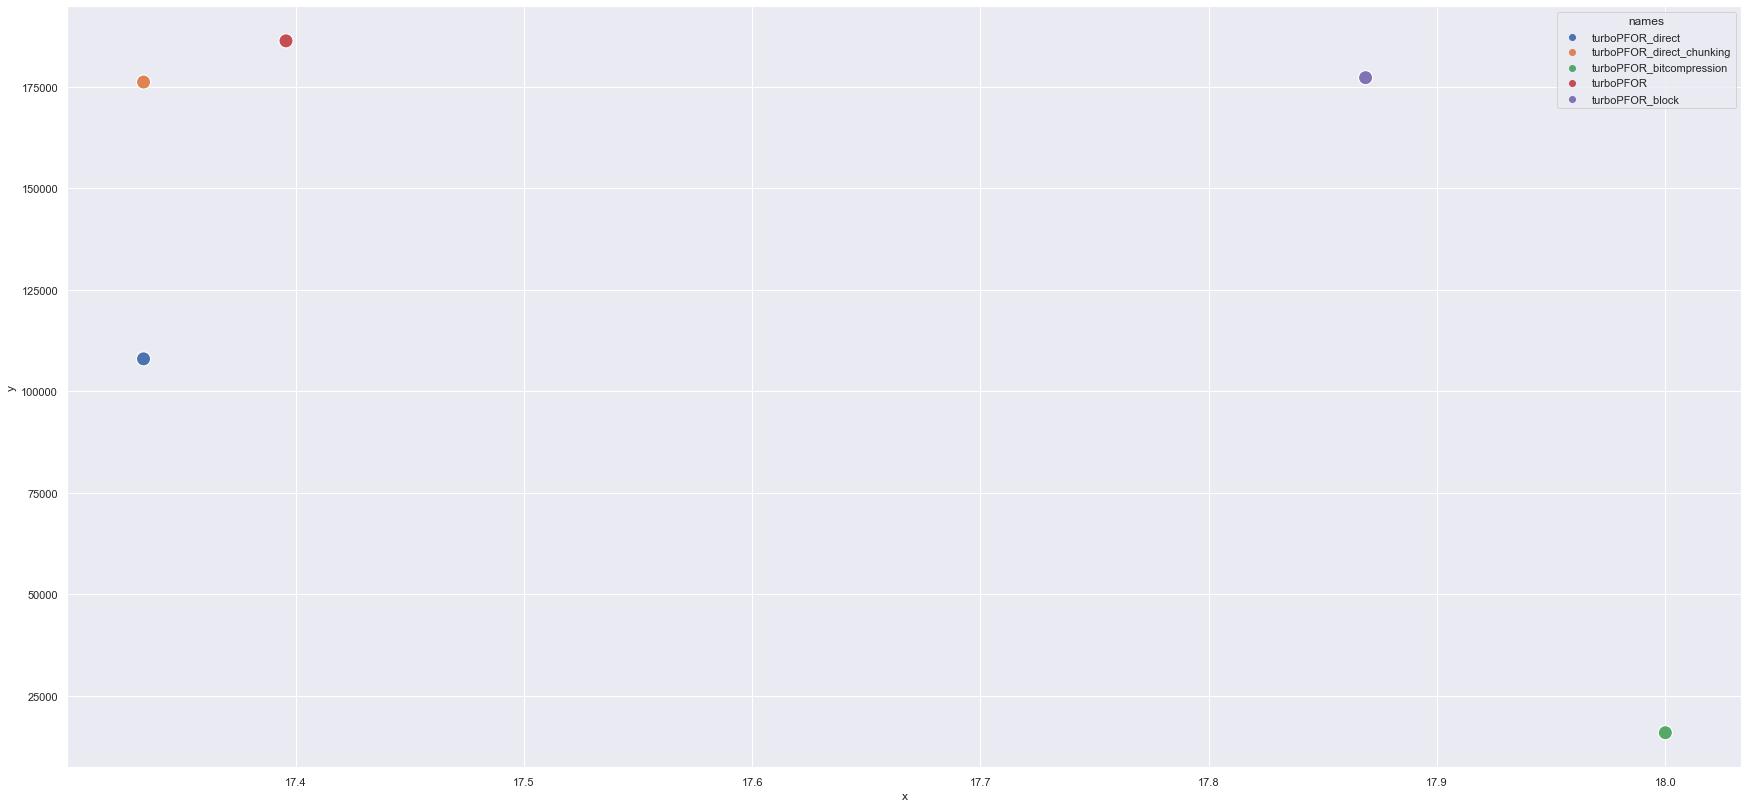

In [25]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)
